In [53]:
import os
from os import path
import shutil
import pandas as pd
from matplotlib import pyplot as plt

In [54]:
# Fetch all regular motion files
target_path_1 = '../Traces_Simulation/PTP_Away_and_Close_Sim/PTPAwayClose'
target_path_2 = '../Traces_Real/PTP_Away_and_Close_Real/PTPAwayClose'
root_path = './'
fileNames_1 = os.listdir(target_path_1)
fileNames_2 = os.listdir(target_path_2)

fileNames_Away_Sim_1 = [file for file in fileNames_1 if 'A1_away_10_KRCIpo.csv' in file or 'A2_away_10_KRCIpo.csv' in file or 'A3_away_10_KRCIpo.csv' in file]
fileNames_Close_Sim_1 = [file for file in fileNames_1 if 'A1_close_10_KRCIpo.csv' in file or 'A2_close_10_KRCIpo.csv' in file or 'A3_close_10_KRCIpo.csv' in file]
fileNames_Away_Real_1 = [file for file in fileNames_2 if 'A1_away_10_KRCIpo.csv' in file or 'A2_away_10_KRCIpo.csv' in file or 'A3_away_10_KRCIpo.csv' in file]
fileNames_Close_Real_1 = [file for file in fileNames_2 if 'A1_close_10_KRCIpo.csv' in file or 'A2_close_10_KRCIpo.csv' in file or 'A3_close_10_KRCIpo.csv' in file]

for file in fileNames_Away_Sim_1:
    shutil.copy(path.join(target_path_1, file), root_path)

for file in fileNames_Close_Sim_1:
    shutil.copy(path.join(target_path_1, file), root_path)

for file in fileNames_Away_Real_1:
    shutil.copy(path.join(target_path_2, file), root_path)

for file in fileNames_Close_Real_1:
    shutil.copy(path.join(target_path_2, file), root_path)

fileNames_Away_Sim = [file for file in fileNames_1 if 'A1_away_10_NextGenDrive#1.csv' in file or 'A2_away_10_NextGenDrive#2.csv' in file or 'A3_away_10_NextGenDrive#3.csv' in file]
fileNames_Close_Sim = [file for file in fileNames_1 if 'A1_close_10_NextGenDrive#1.csv' in file or 'A2_close_10_NextGenDrive#2.csv' in file or 'A3_close_10_NextGenDrive#3.csv' in file]
fileNames_Away_Real = [file for file in fileNames_2 if 'A1_away_10_NextGenDrive#1.csv' in file or 'A2_away_10_NextGenDrive#2.csv' in file or 'A3_away_10_NextGenDrive#3.csv' in file]
fileNames_Close_Real = [file for file in fileNames_2 if 'A1_close_10_NextGenDrive#1.csv' in file or 'A2_close_10_NextGenDrive#2.csv' in file or 'A3_close_10_NextGenDrive#3.csv' in file]

for file in fileNames_Away_Sim:
    shutil.copy(path.join(target_path_1, file), root_path)

for file in fileNames_Close_Sim:
    shutil.copy(path.join(target_path_1, file), root_path)

for file in fileNames_Away_Real:
    shutil.copy(path.join(target_path_2, file), root_path)

for file in fileNames_Close_Real:
    shutil.copy(path.join(target_path_2, file), root_path)


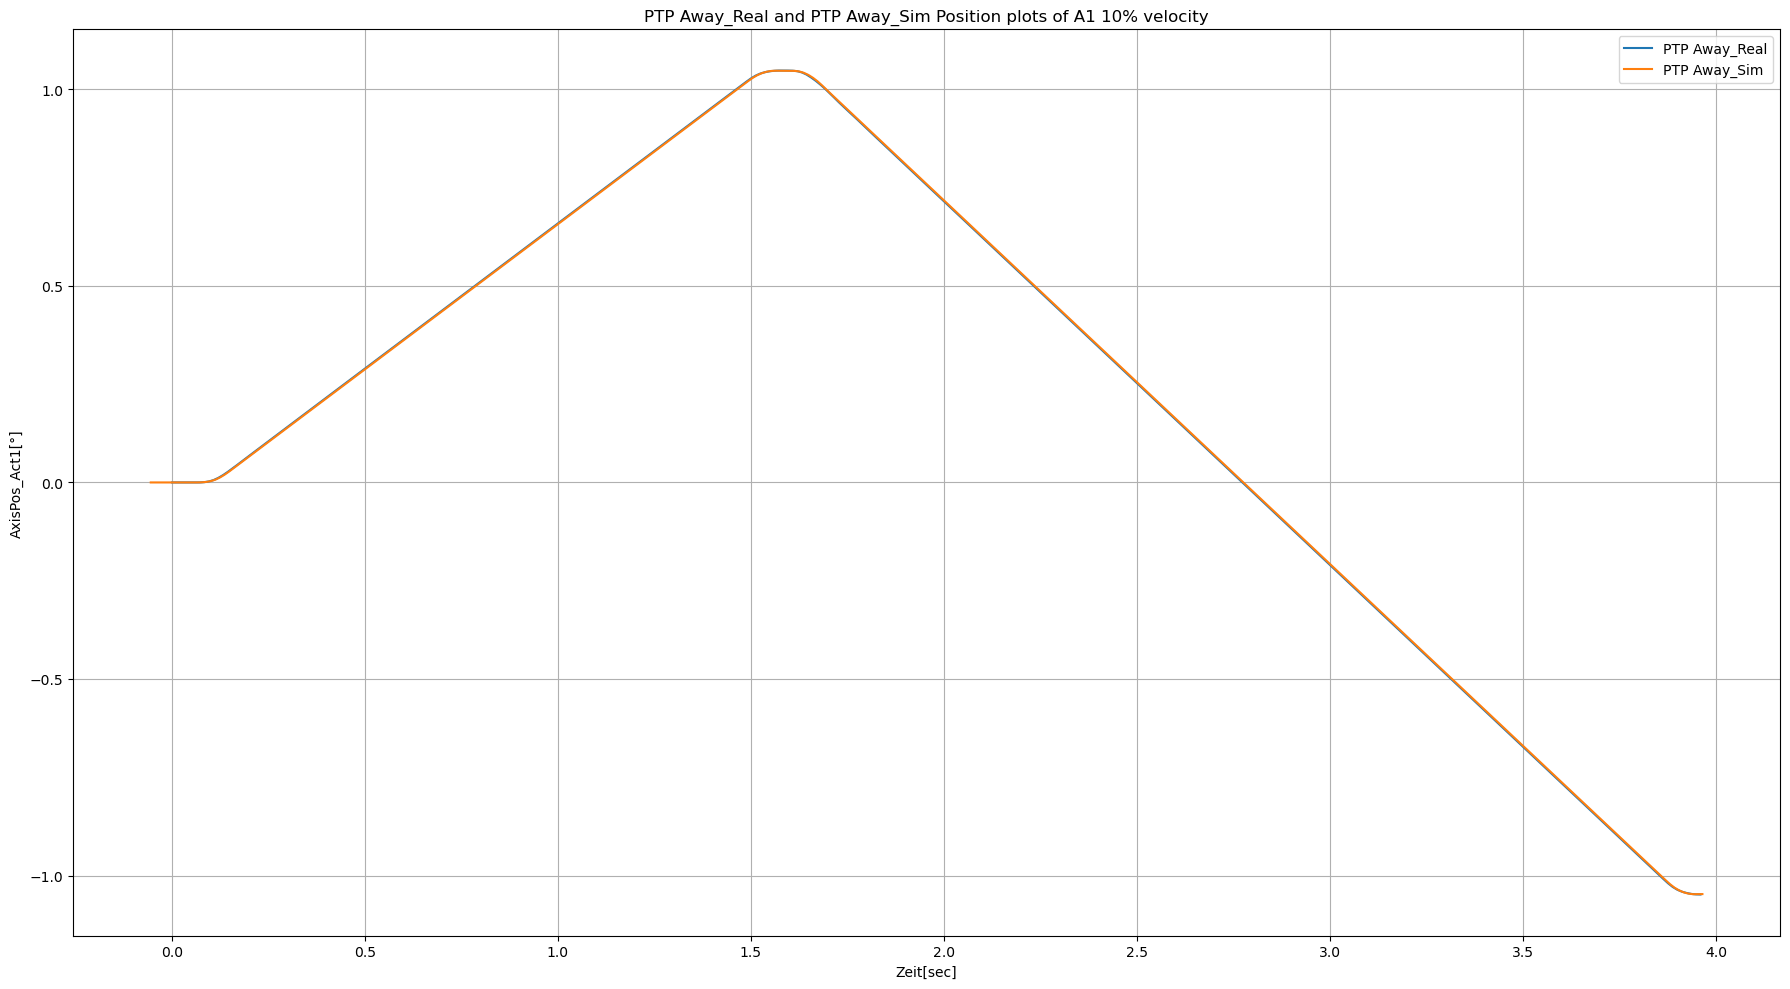

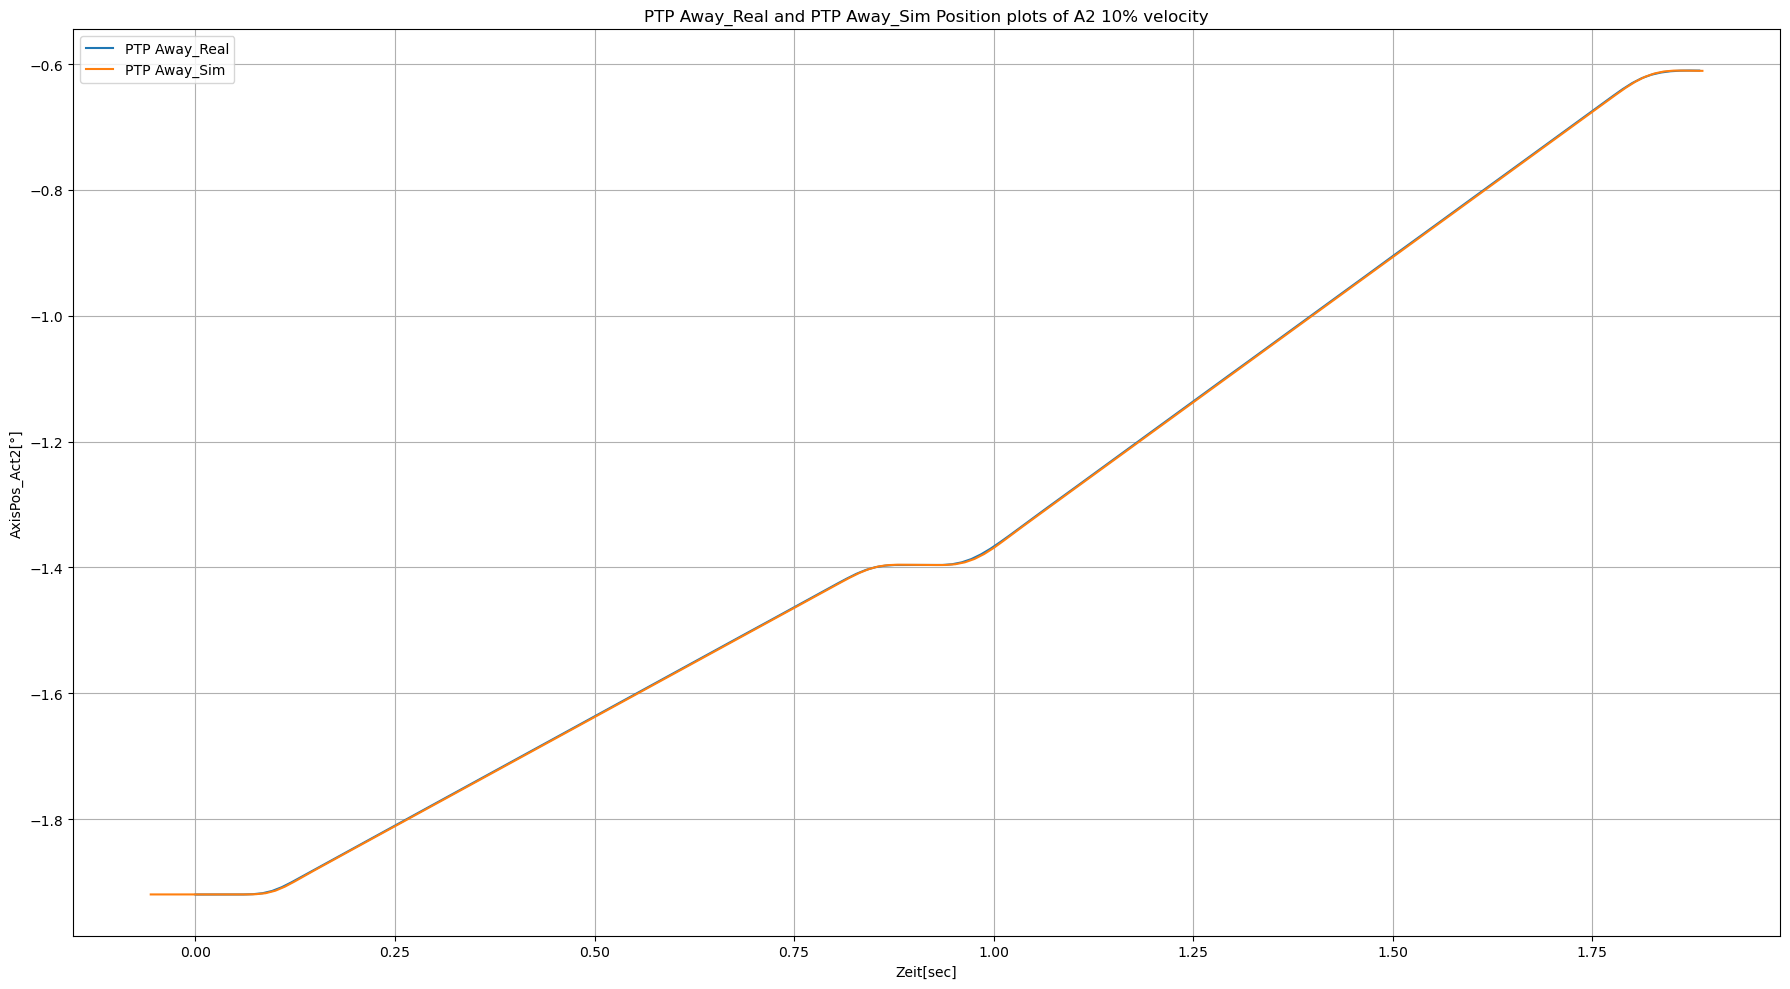

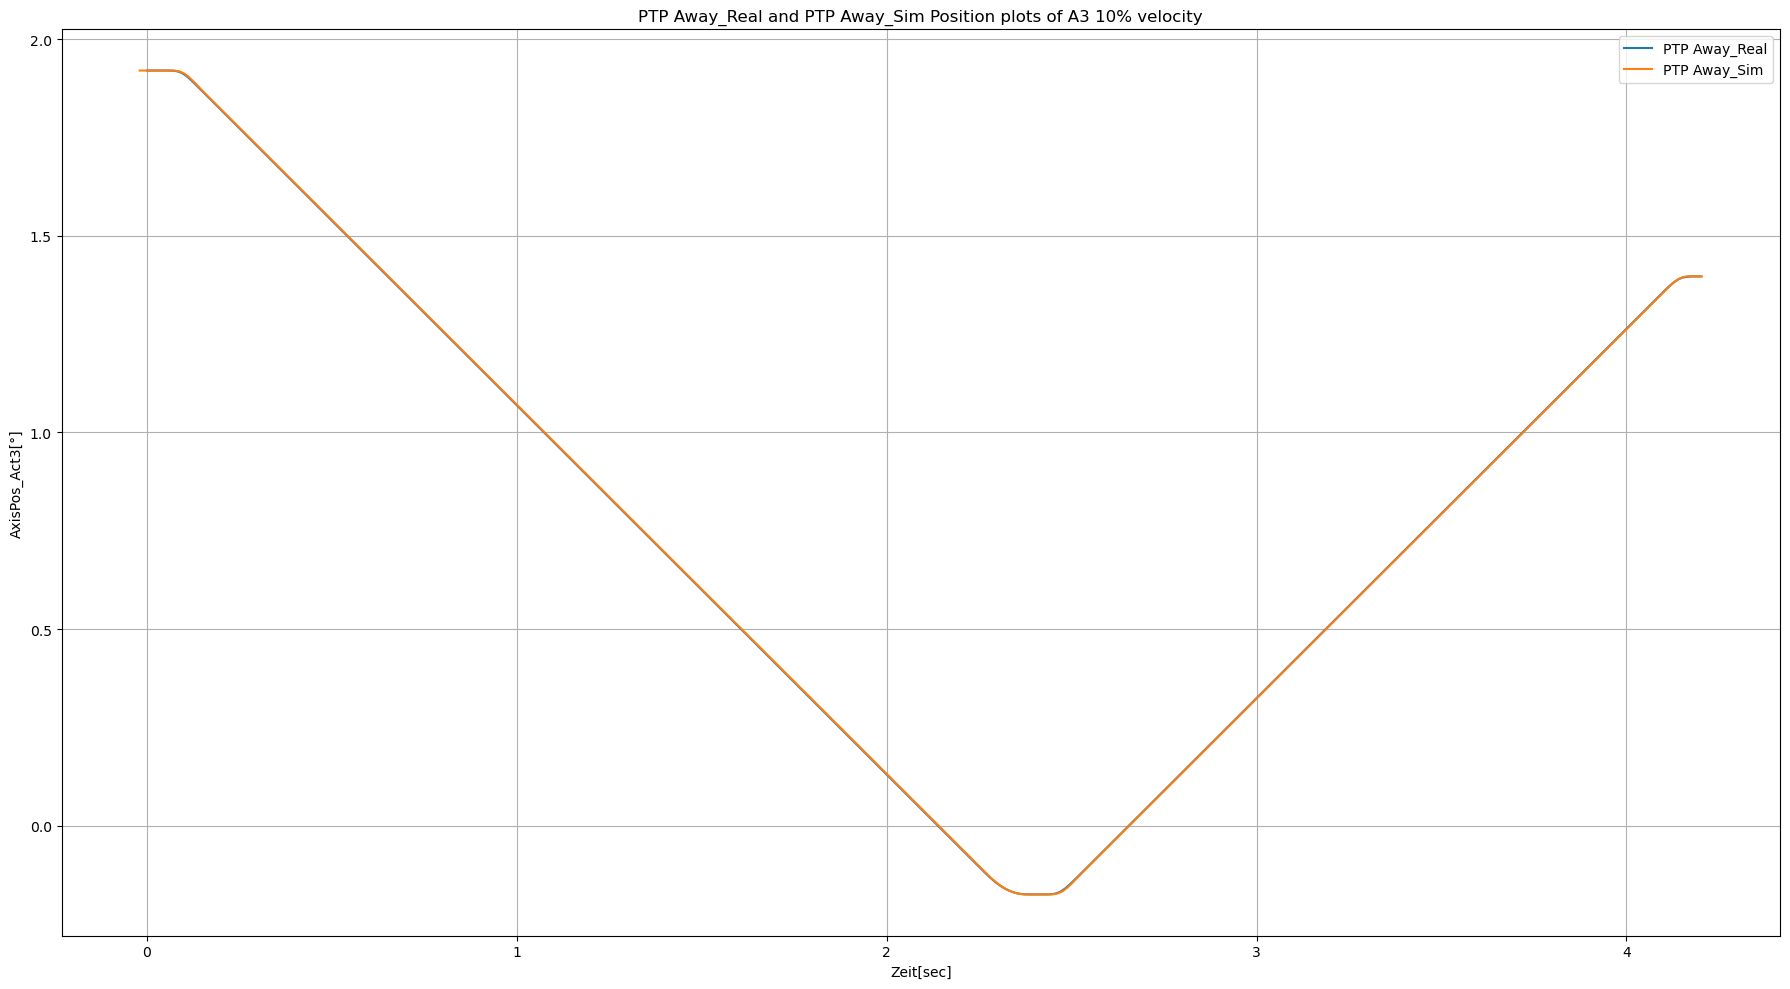

In [55]:
##############################################################################################################
# Away Position plot
li_Away_Real = []
li_Away_Sim = []
if(len(fileNames_Away_Real_1)==len(fileNames_Away_Sim_1)):
        for i in range(len(fileNames_Away_Real_1)):
                df_Away_Real = pd.read_csv(fileNames_Away_Real_1[i], delimiter=';', encoding='cp1252')
                df_Away_Sim = pd.read_csv(fileNames_Away_Sim_1[i], delimiter=';', encoding='cp1252')
                li_Away_Real.append(df_Away_Real)
                li_Away_Sim.append(df_Away_Sim)
                pos_col_away_real = li_Away_Real[i].columns[i+7]
                pos_col_away_sim = li_Away_Sim[i].columns[i+7]

                if (i==0):
                        shift = 0.055

                elif (i==1):
                        shift = 0.056
                
                elif (i==2):
                        shift = 0.02

                time_Shift = li_Away_Sim[i]['Zeit[sec]'] - shift
                li_Away_Sim[i]['Zeit[sec]'] = time_Shift
                
                plt.figure(num=1, figsize=(18,10), dpi=100, tight_layout=True)
                plt.plot(li_Away_Real[i]['Zeit[sec]'], li_Away_Real[i][pos_col_away_real], label = 'PTP Away_Real')
                plt.plot(li_Away_Sim[i]['Zeit[sec]'], li_Away_Sim[i][pos_col_away_sim], label = 'PTP Away_Sim')
                plt.legend()
                plt.grid()
                plt.xlabel(li_Away_Sim[i].columns[0])
                plt.ylabel(pos_col_away_sim)
                plt.title('PTP Away_Real and PTP Away_Sim Position plots of A' + str(i+1) +' 10% velocity')
                # plt.savefig('Images/Position Away/A' + str(i+1) + '.jpg')
                plt.show()
                plt.close()

                time_Shift = li_Away_Sim[i]['Zeit[sec]'] + shift
                li_Away_Sim[i]['Zeit[sec]'] = time_Shift

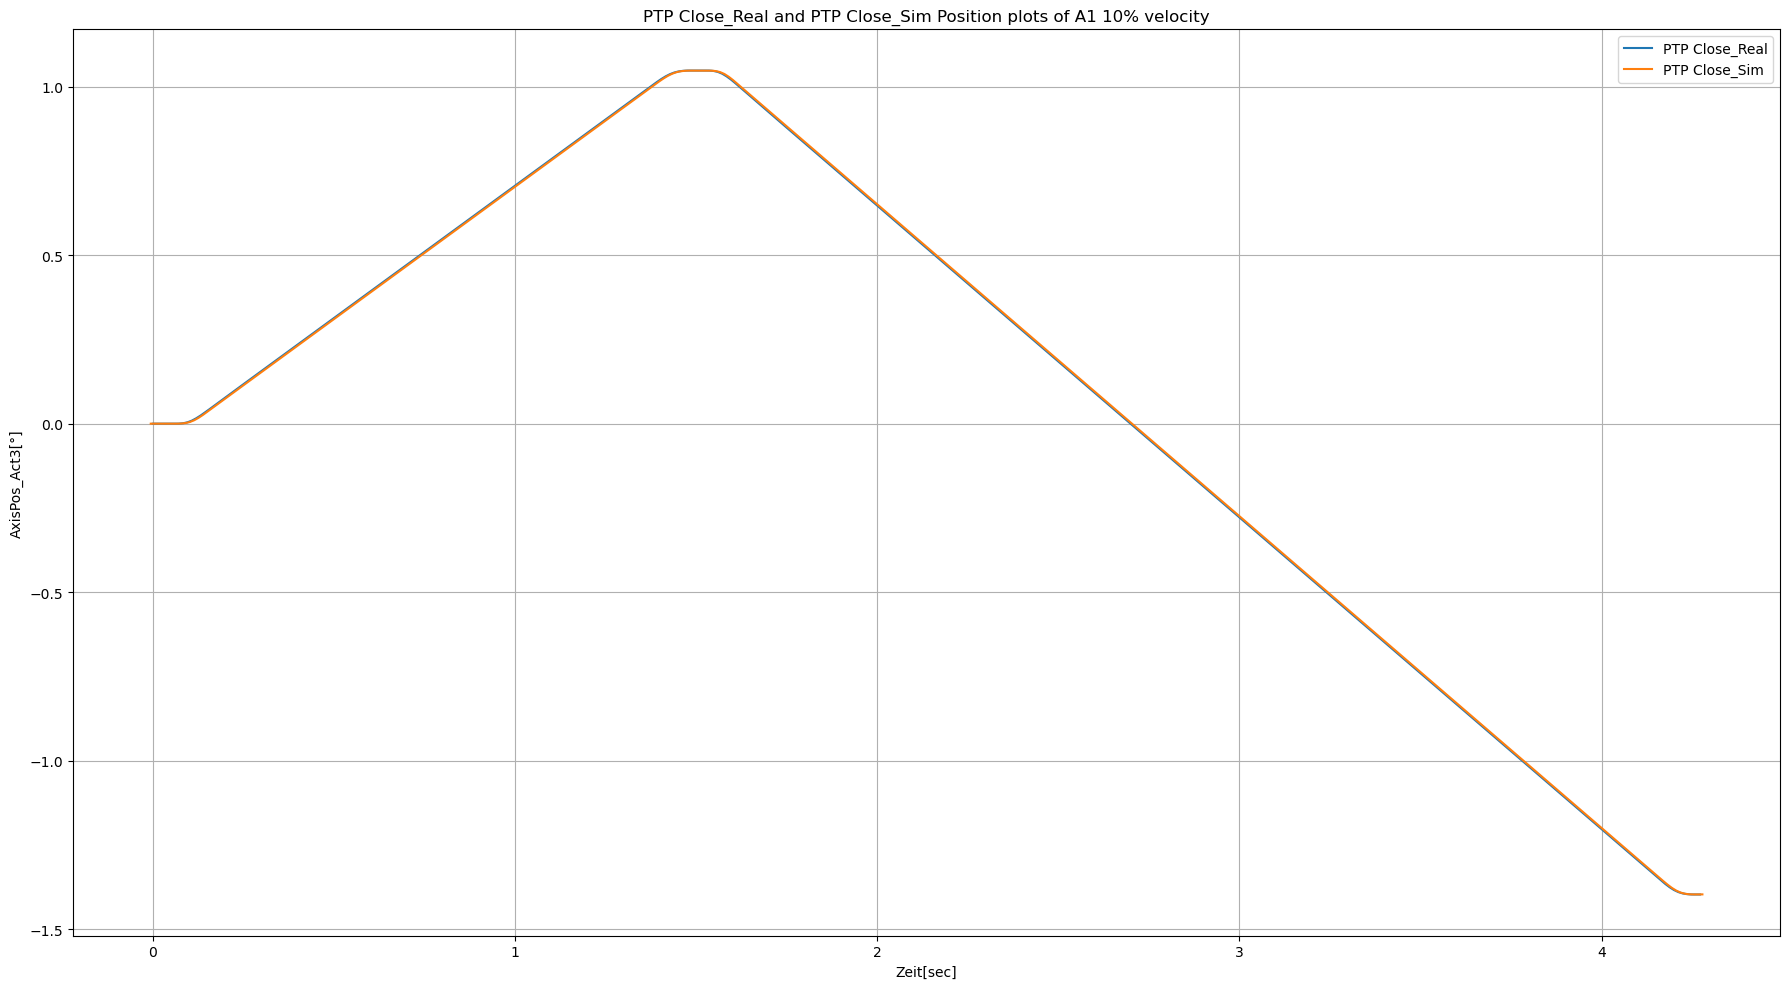

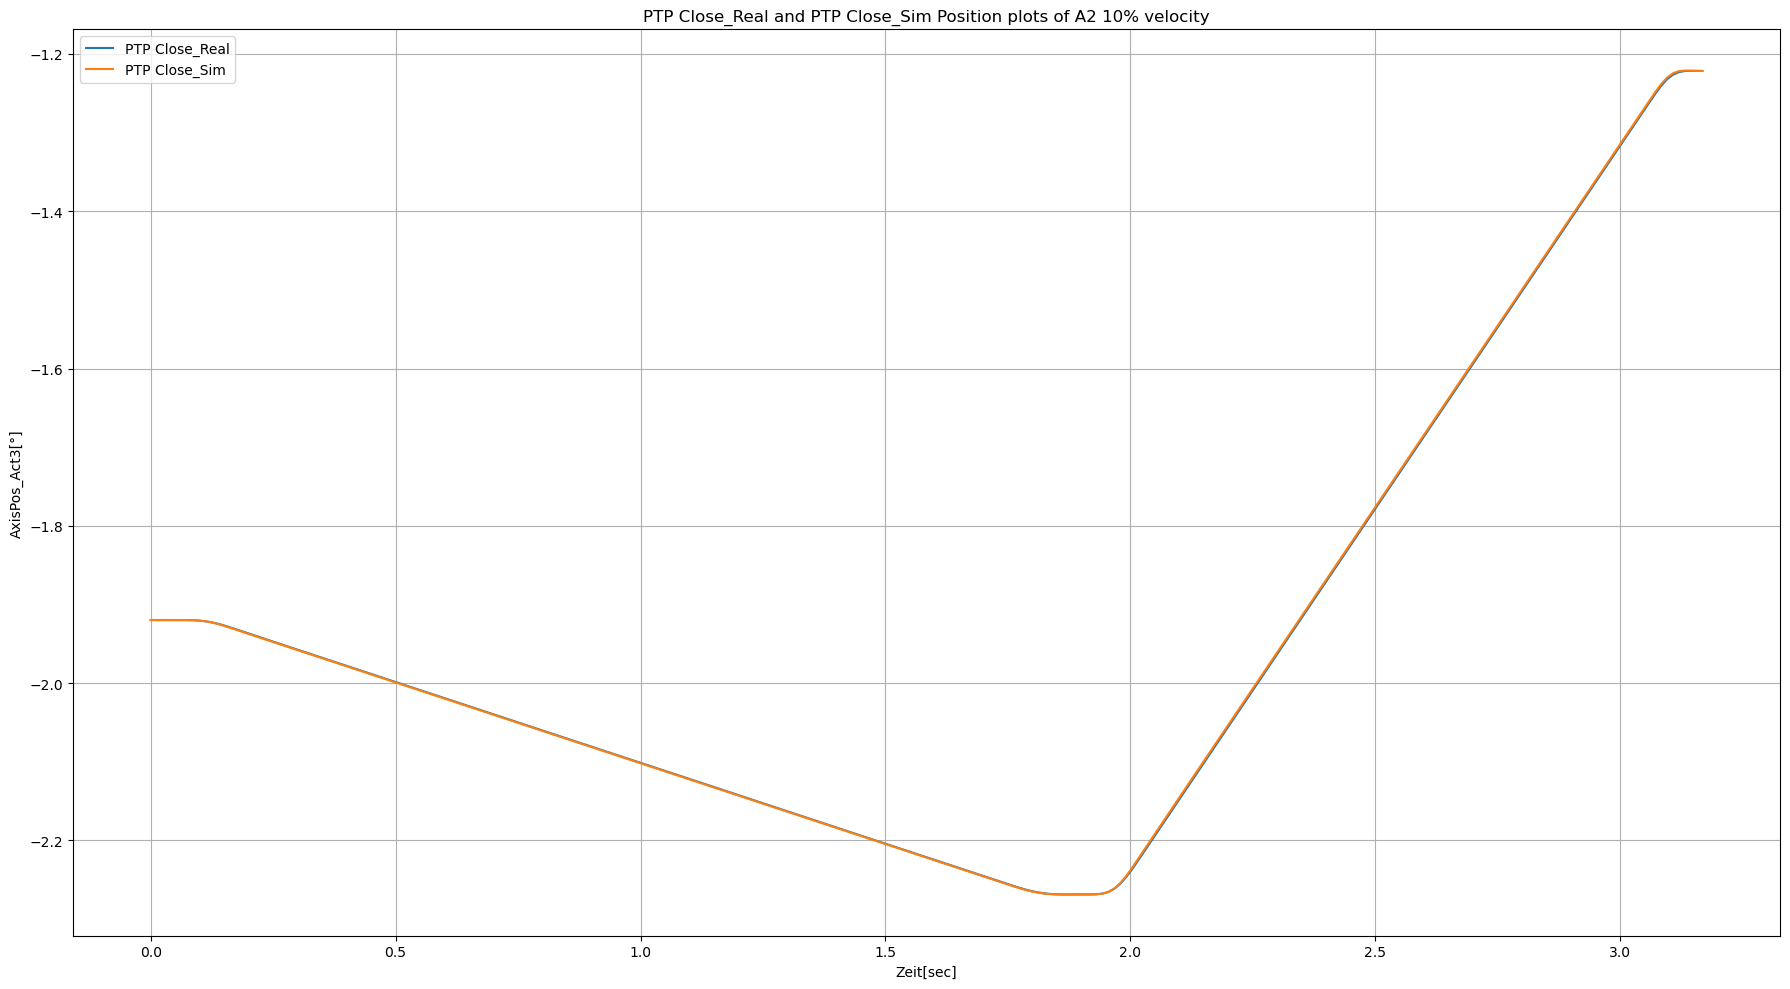

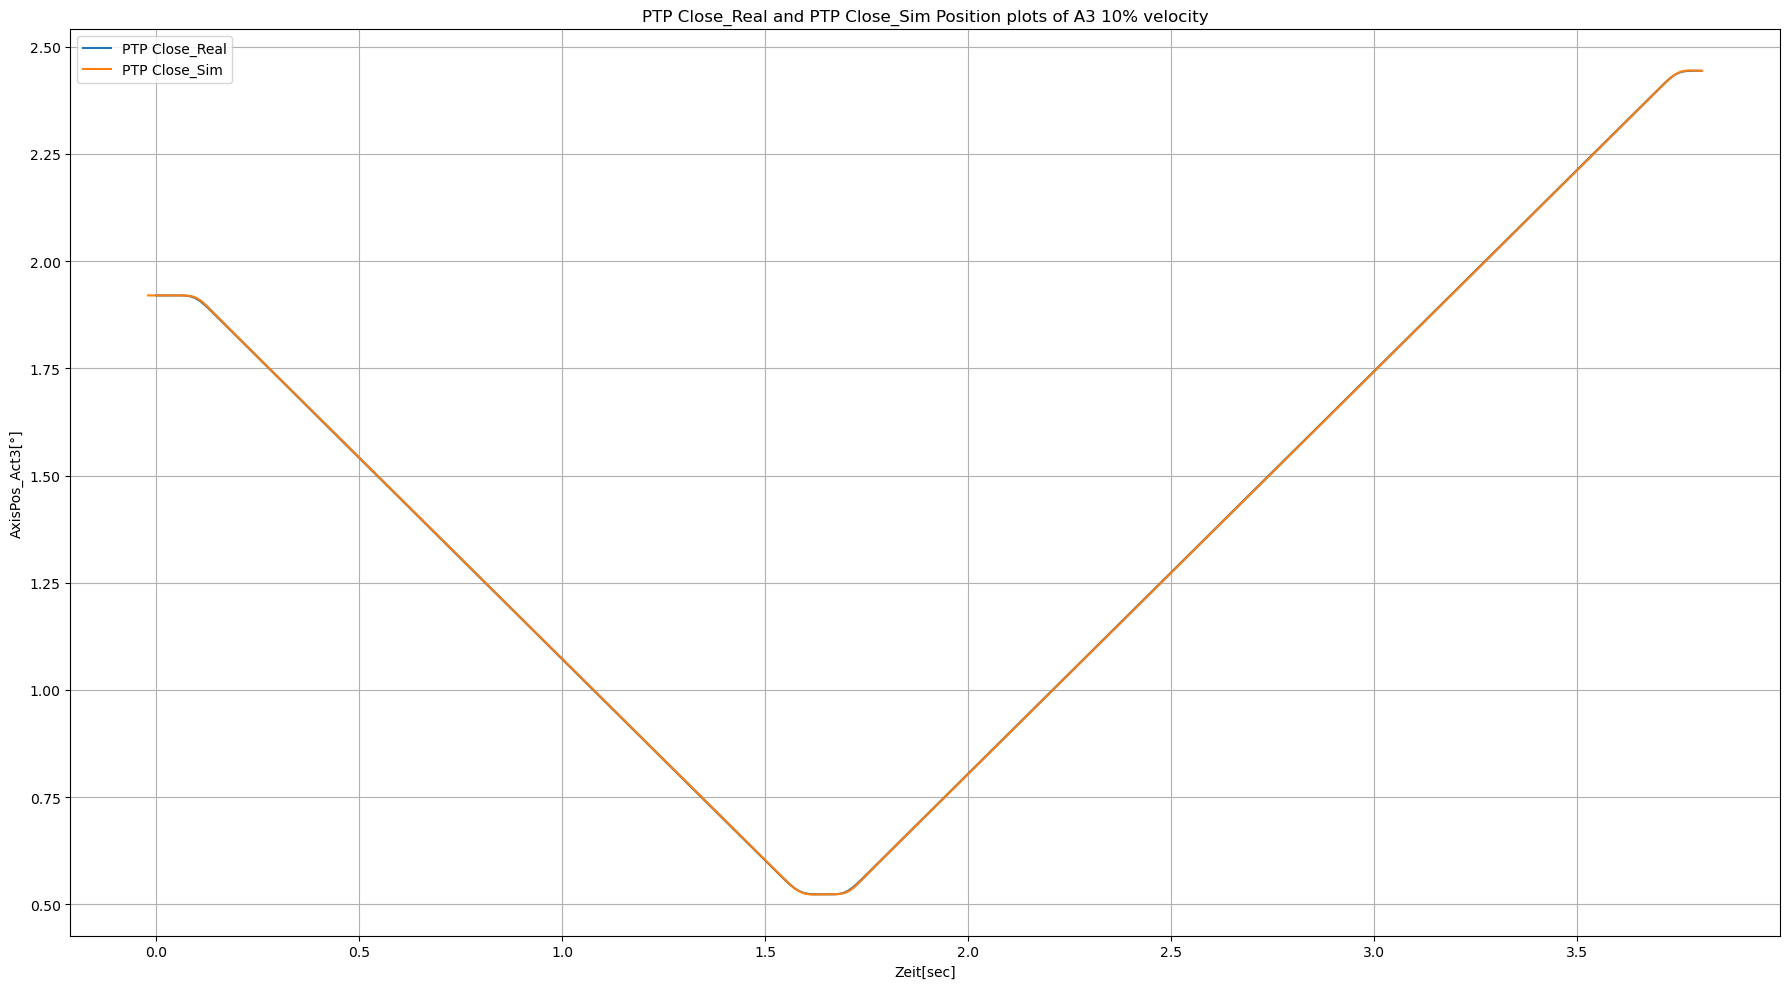

In [56]:
##############################################################################################################
# Close Position plot
li_Close_Real = []
li_Close_Sim = []
if(len(fileNames_Close_Real_1)==len(fileNames_Close_Sim_1)):
        for i in range(len(fileNames_Close_Real_1)):
                df_Close_Real = pd.read_csv(fileNames_Close_Real_1[i], delimiter=';', encoding='cp1252')
                df_Close_Sim = pd.read_csv(fileNames_Close_Sim_1[i], delimiter=';', encoding='cp1252')
                li_Close_Real.append(df_Close_Real)
                li_Close_Sim.append(df_Close_Sim)
                pos_col_close_real = li_Close_Real[i].columns[i+7]
                pos_col_close_sim = li_Close_Sim[i].columns[i+7]

                if (i==0):
                        shift = 0.0055

                elif (i==2):
                        shift = 0.02

                else:
                        shift = 0

                time_Shift = li_Close_Sim[i]['Zeit[sec]'] - shift
                li_Close_Sim[i]['Zeit[sec]'] = time_Shift
                
                plt.figure(num=1, figsize=(18,10), dpi=100, tight_layout=True)
                plt.plot(li_Close_Real[i]['Zeit[sec]'], li_Close_Real[i][pos_col_close_real], label = 'PTP Close_Real')
                plt.plot(li_Close_Sim[i]['Zeit[sec]'], li_Close_Sim[i][pos_col_close_sim], label = 'PTP Close_Sim')
                plt.legend()
                plt.grid()
                plt.xlabel(li_Away_Sim[i].columns[0])
                plt.ylabel(pos_col_away_sim)
                plt.title('PTP Close_Real and PTP Close_Sim Position plots of A' + str(i+1) +' 10% velocity')
                # plt.savefig('Images/Position Close/A' + str(i+1) + '.jpg')
                plt.show()
                plt.close()

                time_Shift = li_Close_Sim[i]['Zeit[sec]'] + shift
                li_Close_Sim[i]['Zeit[sec]'] = time_Shift

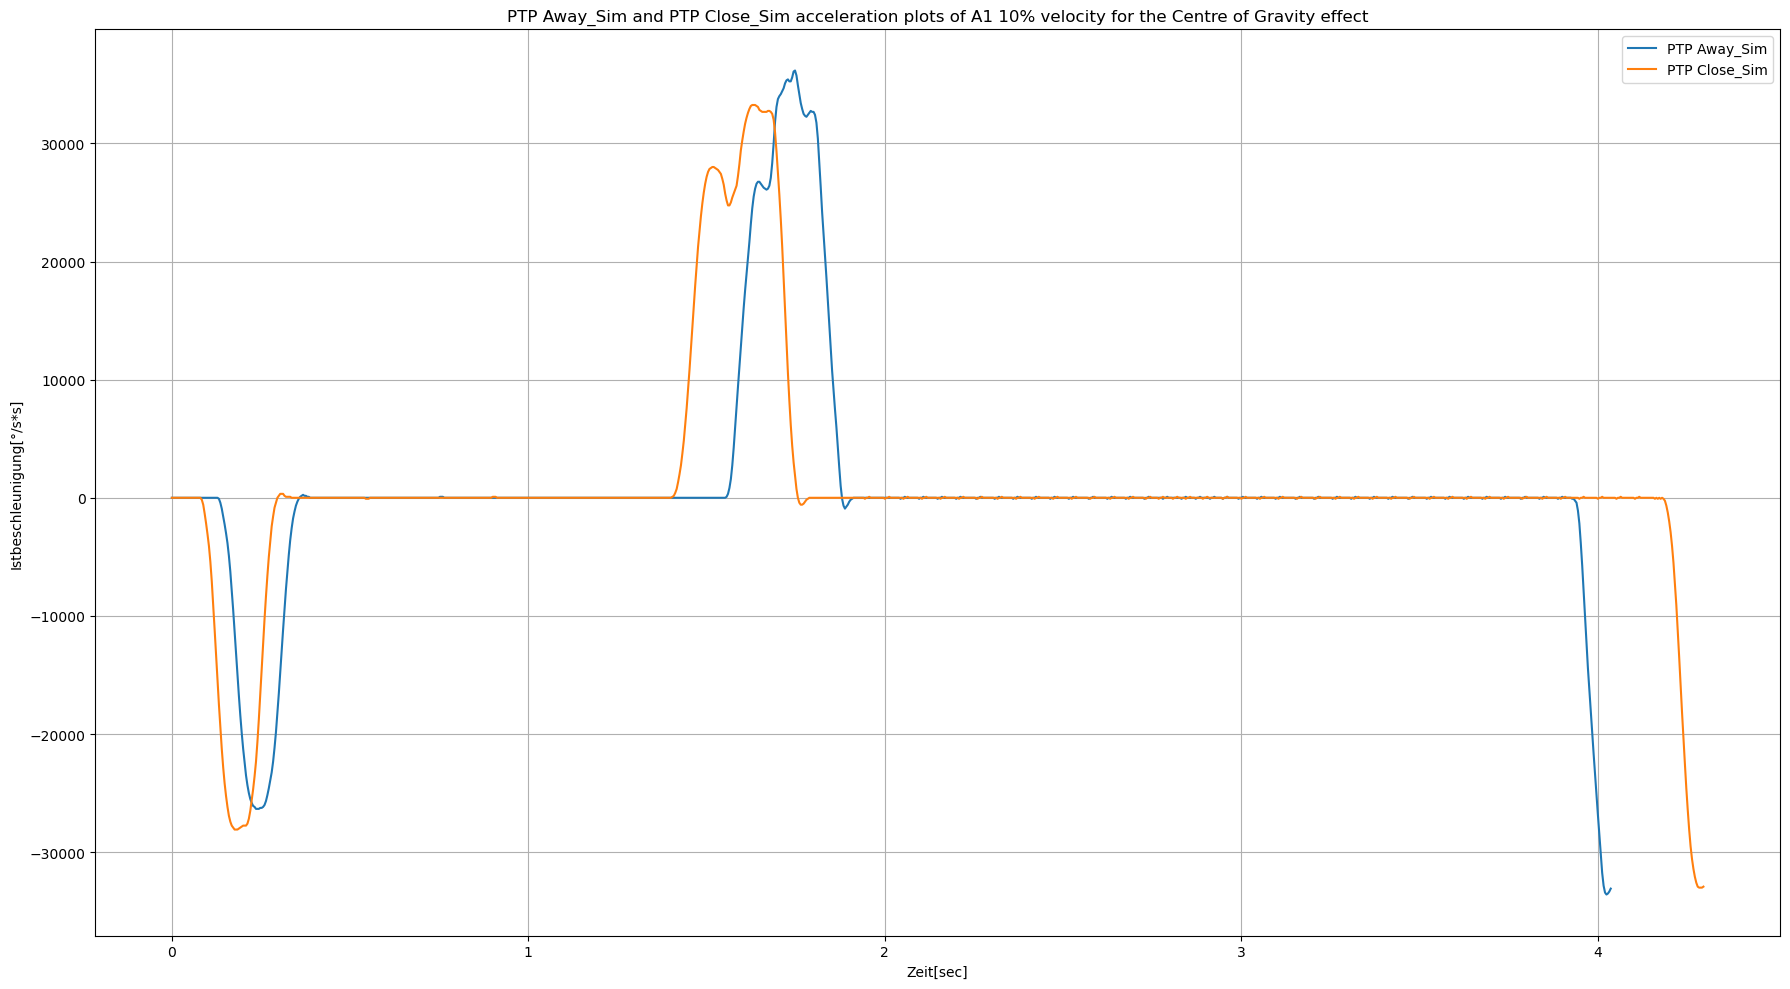

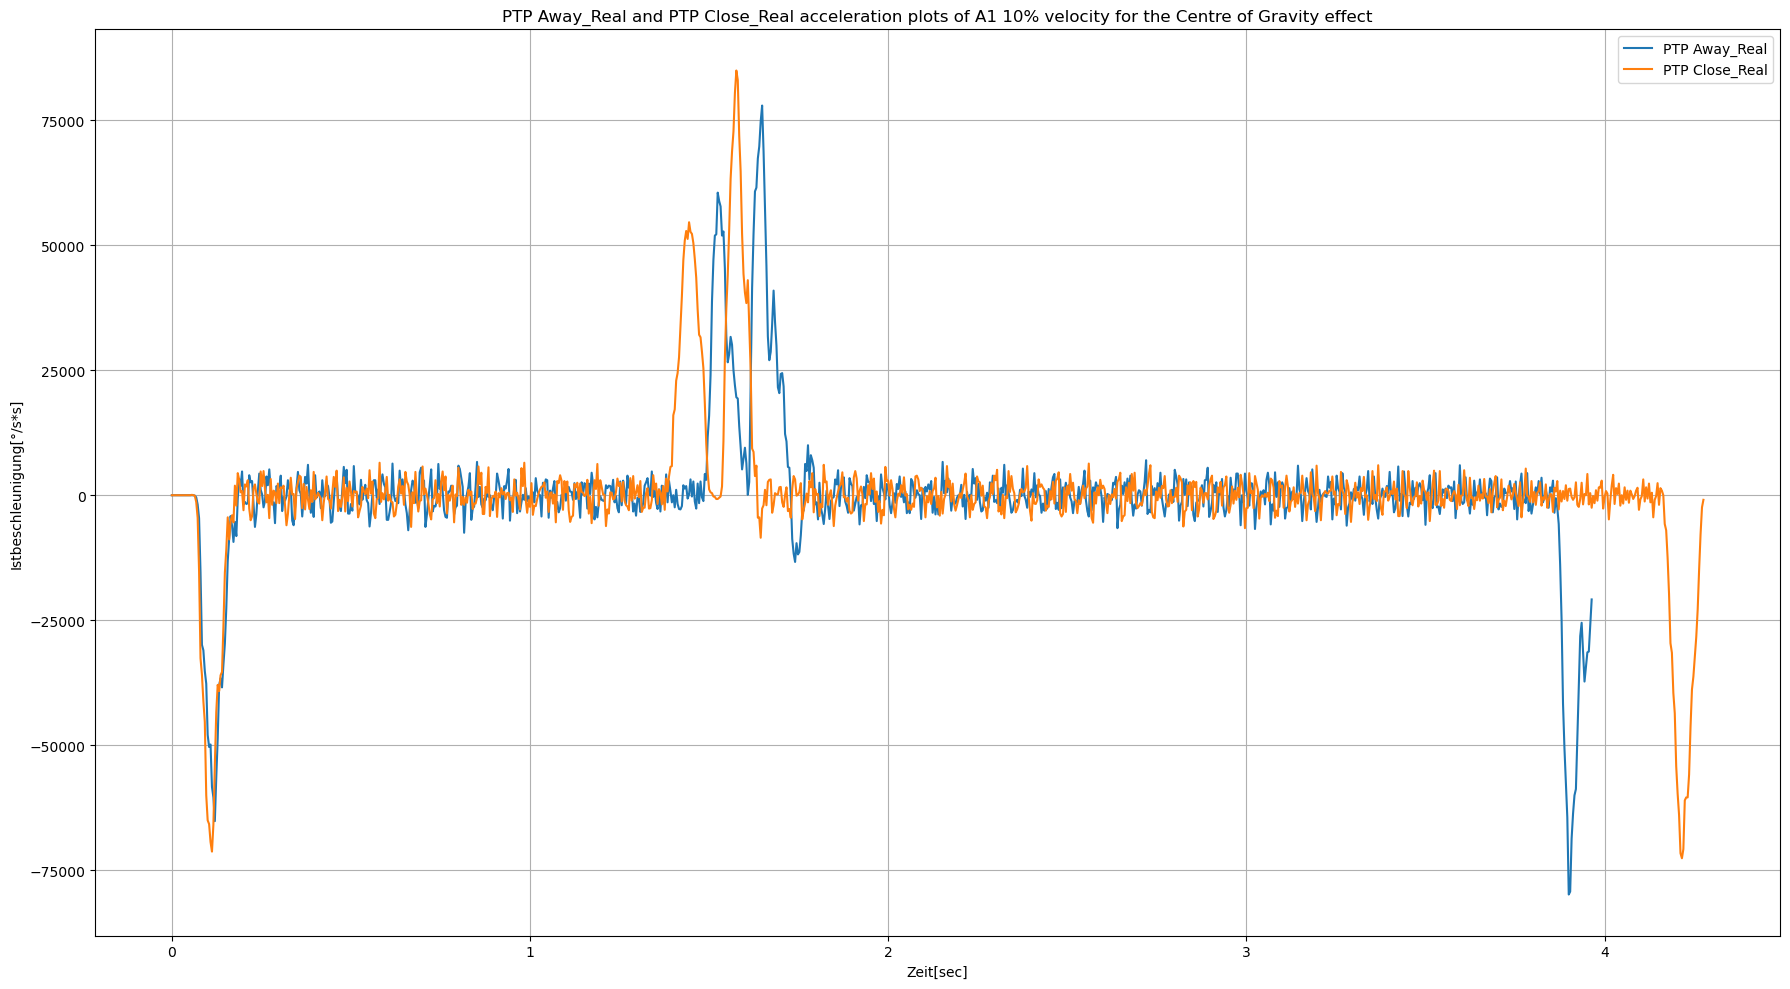

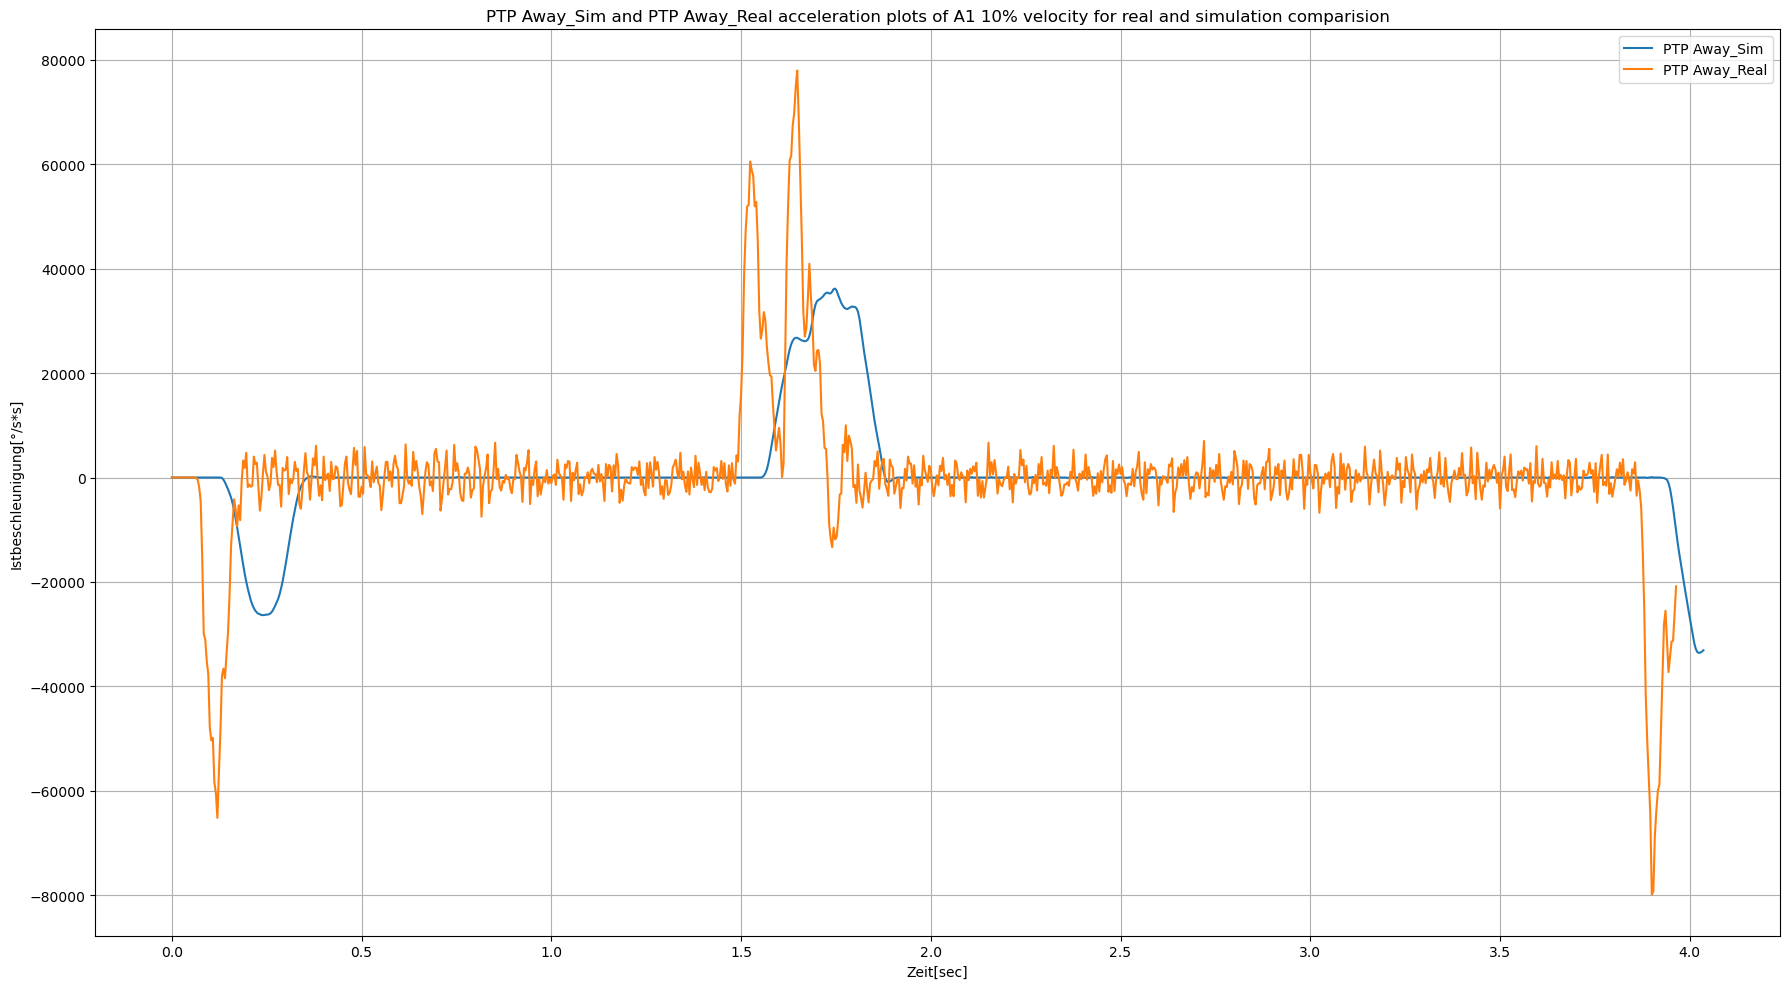

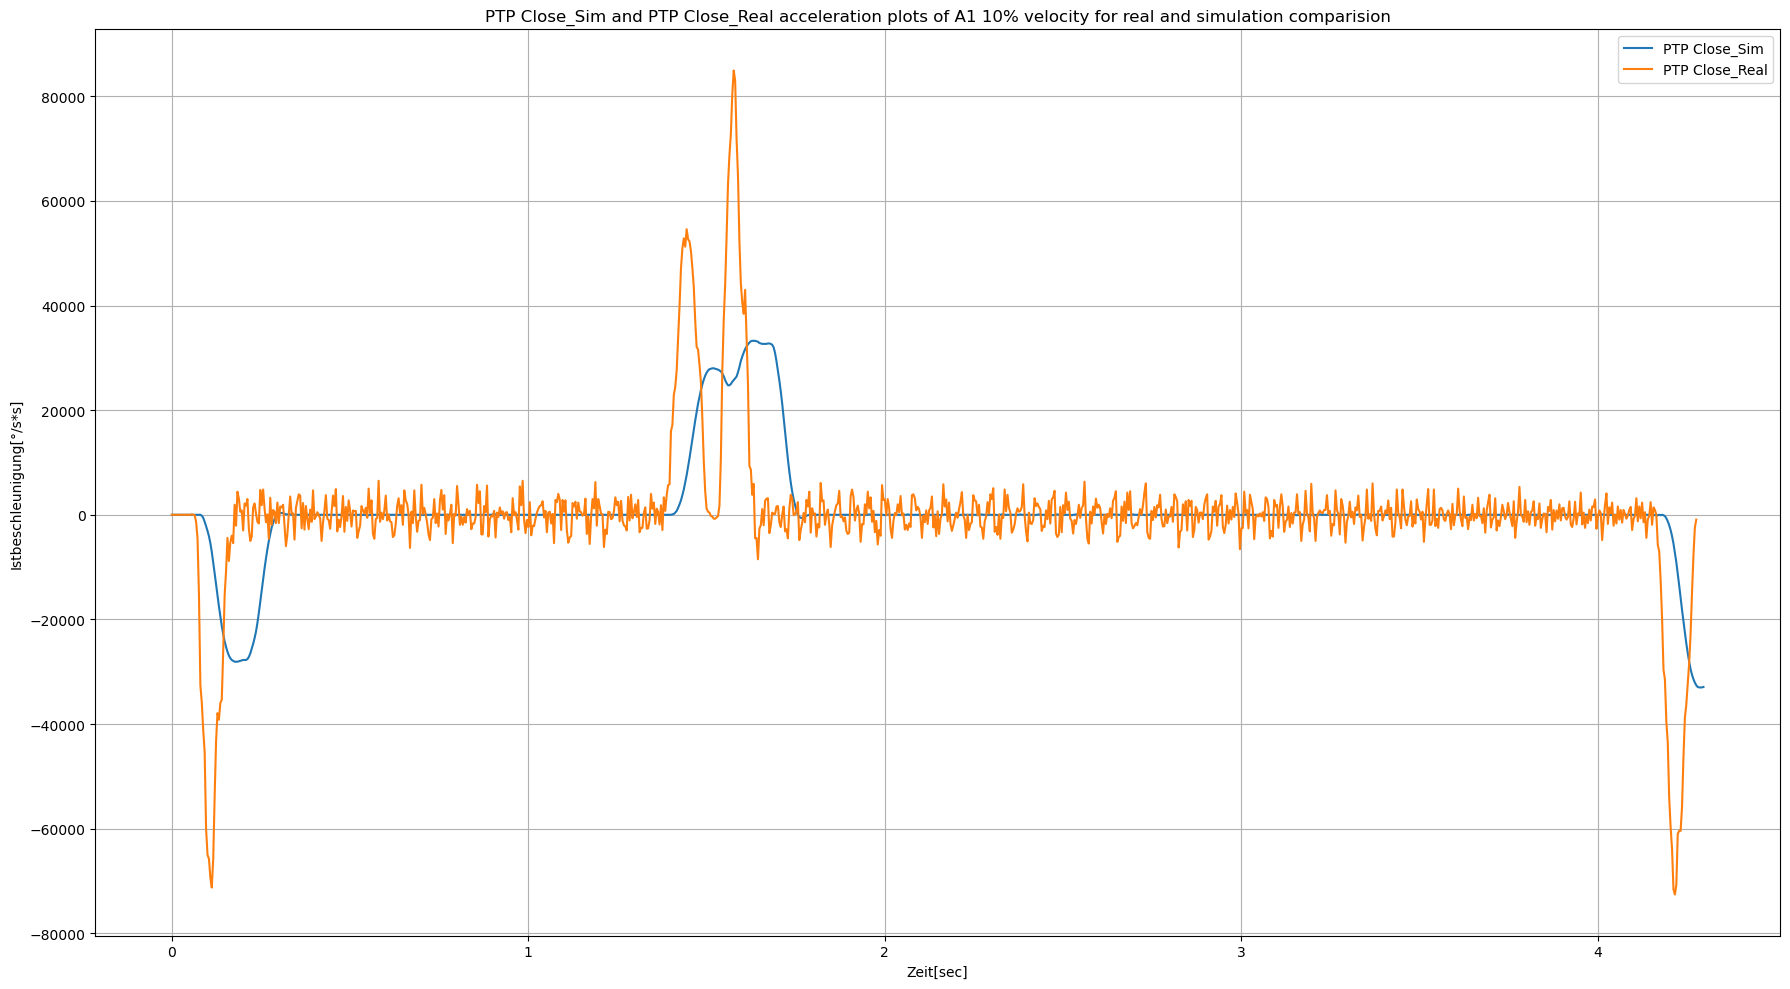

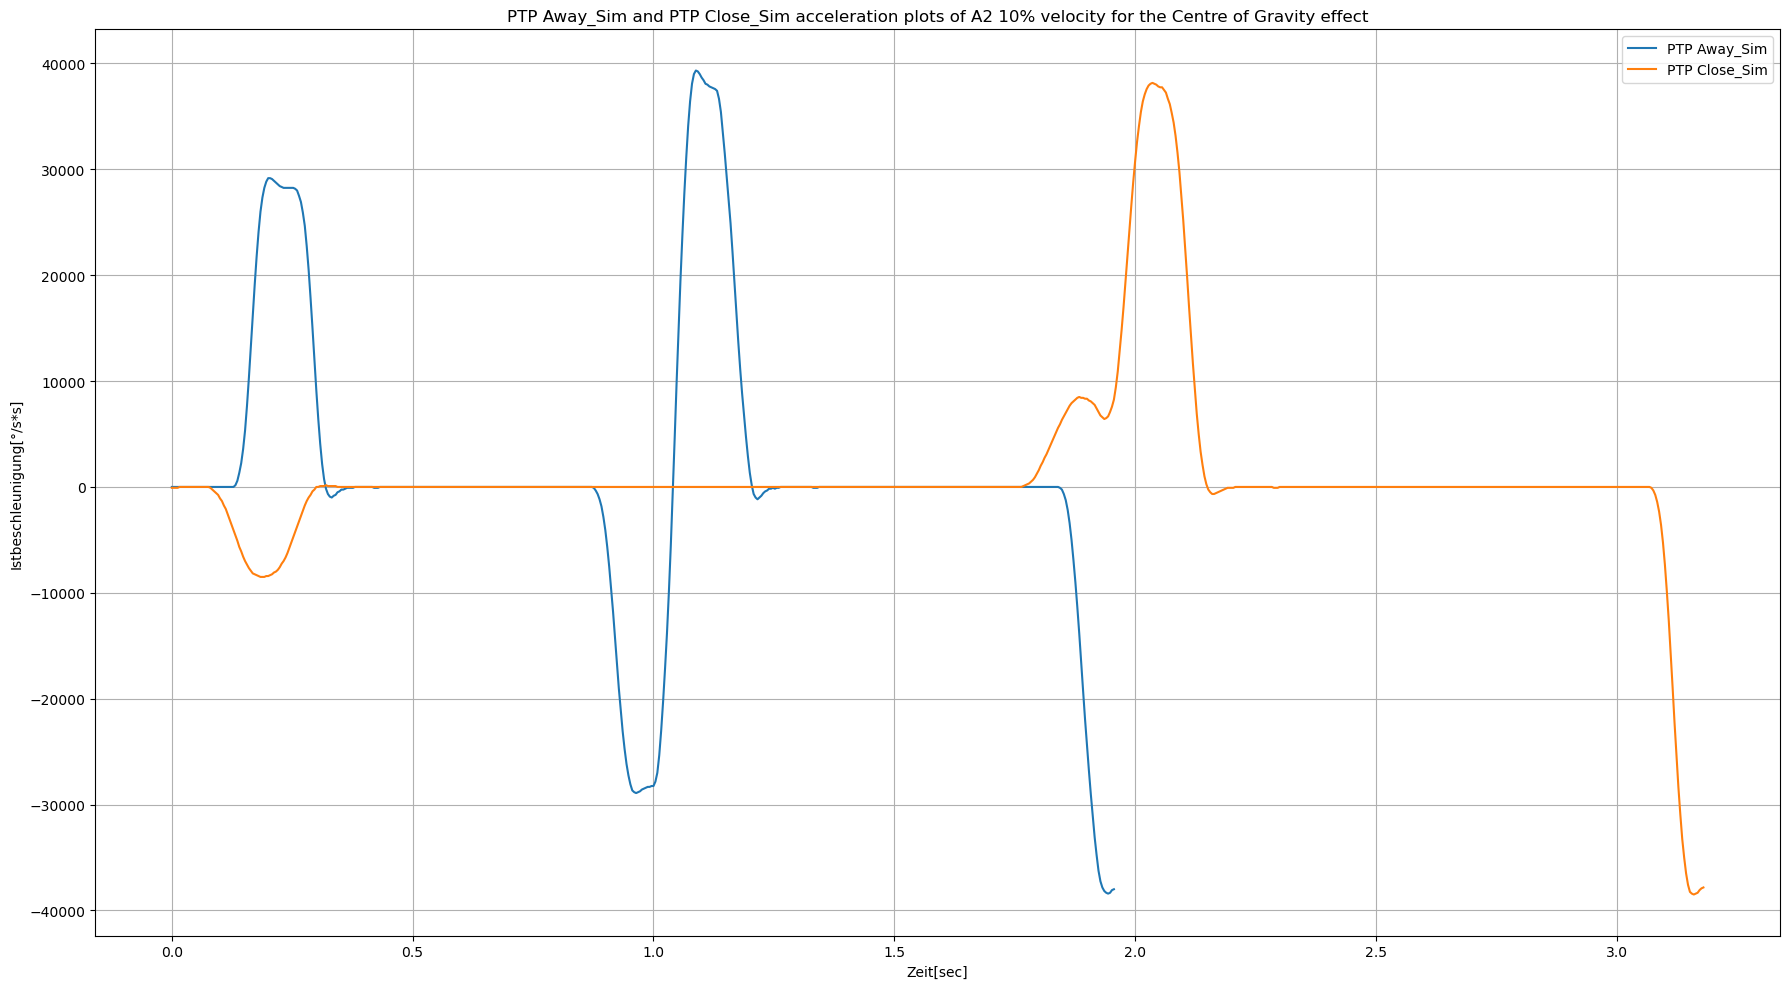

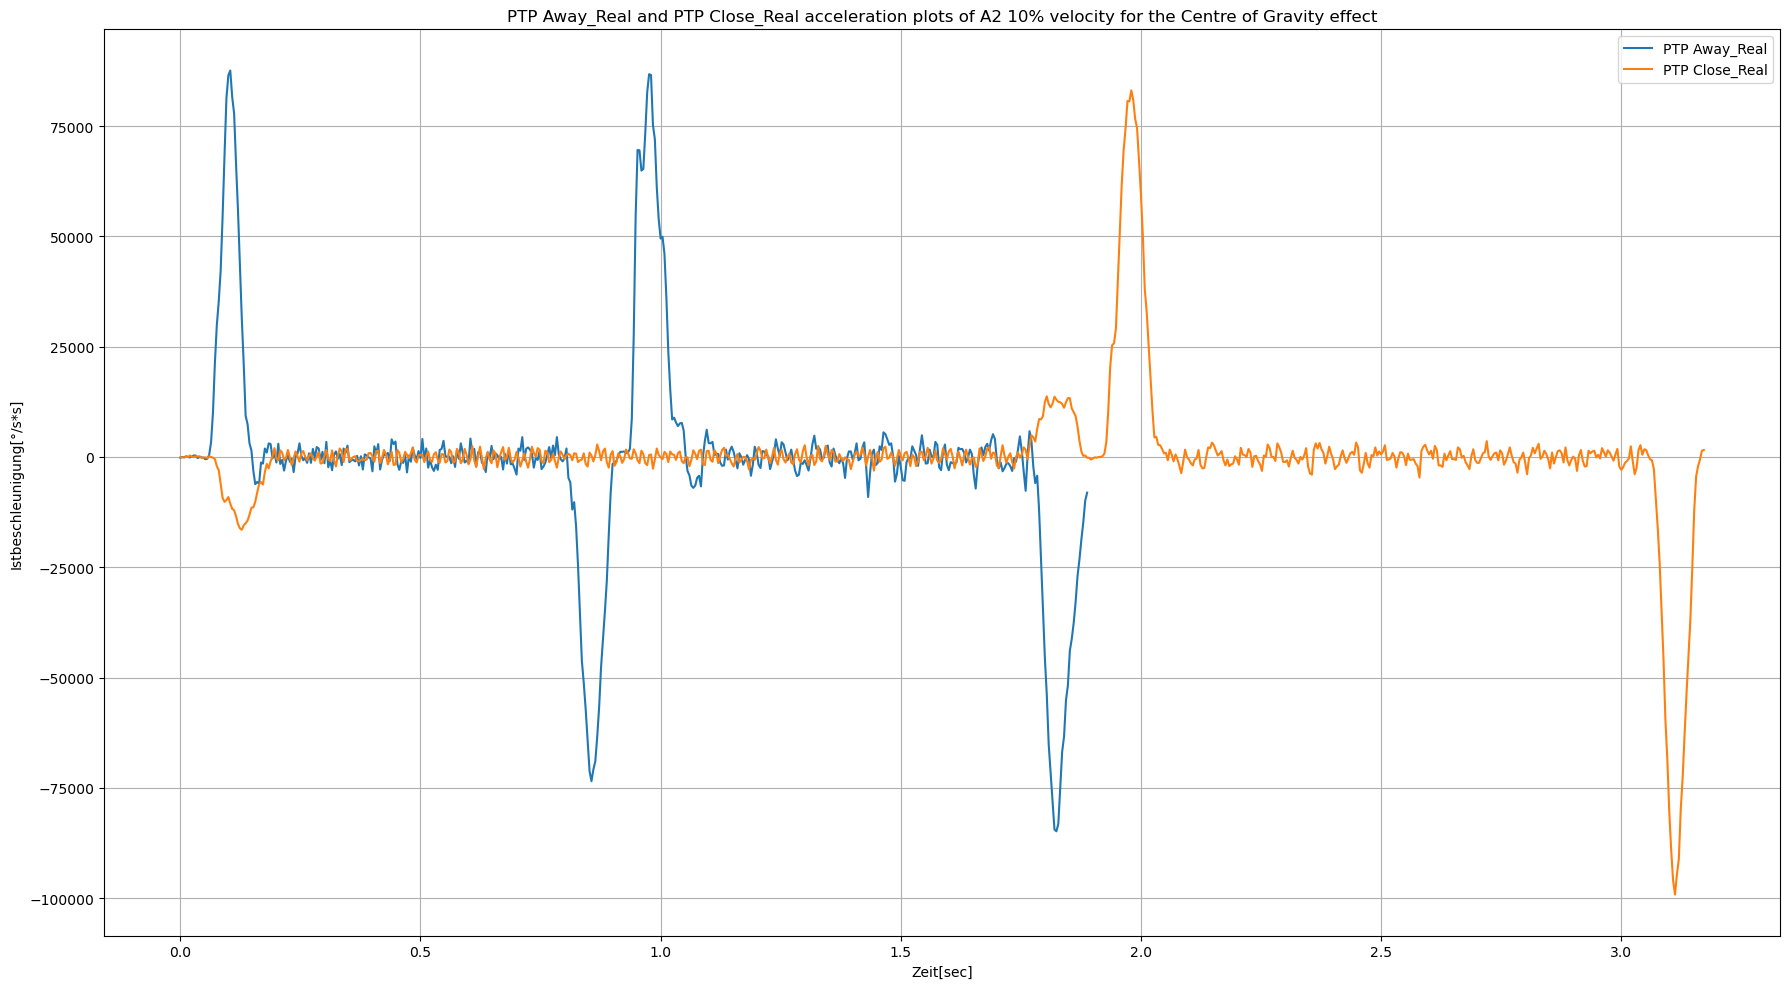

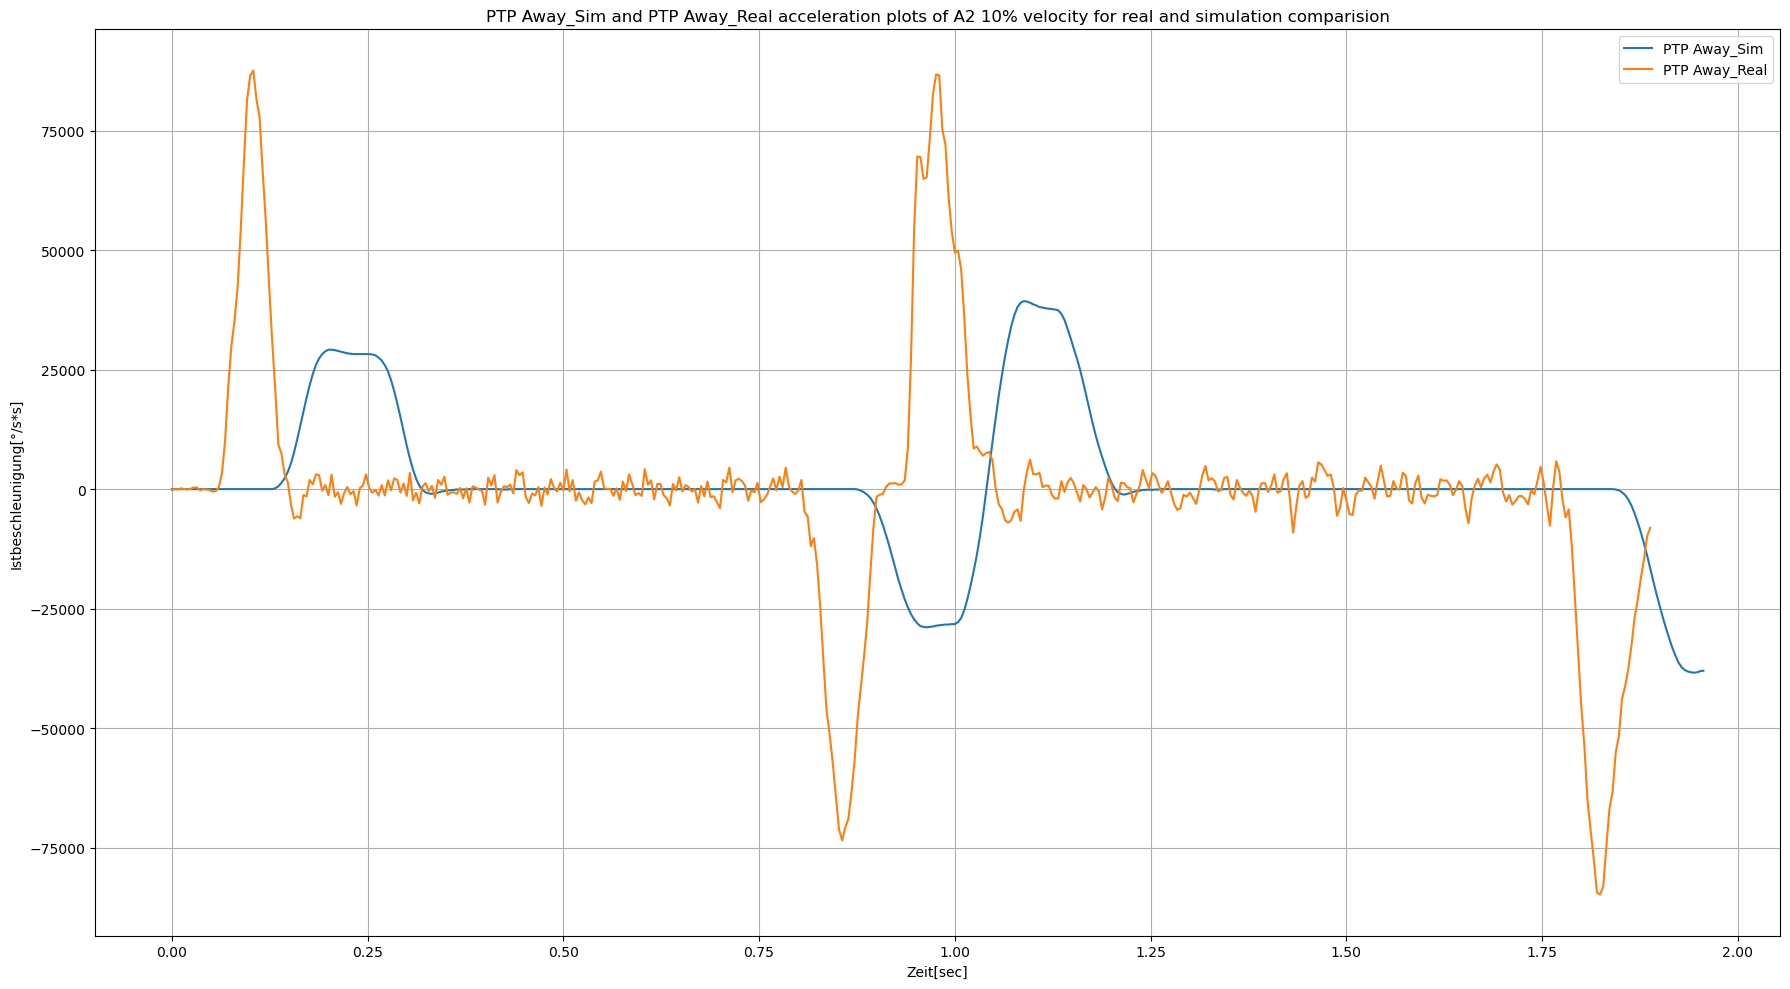

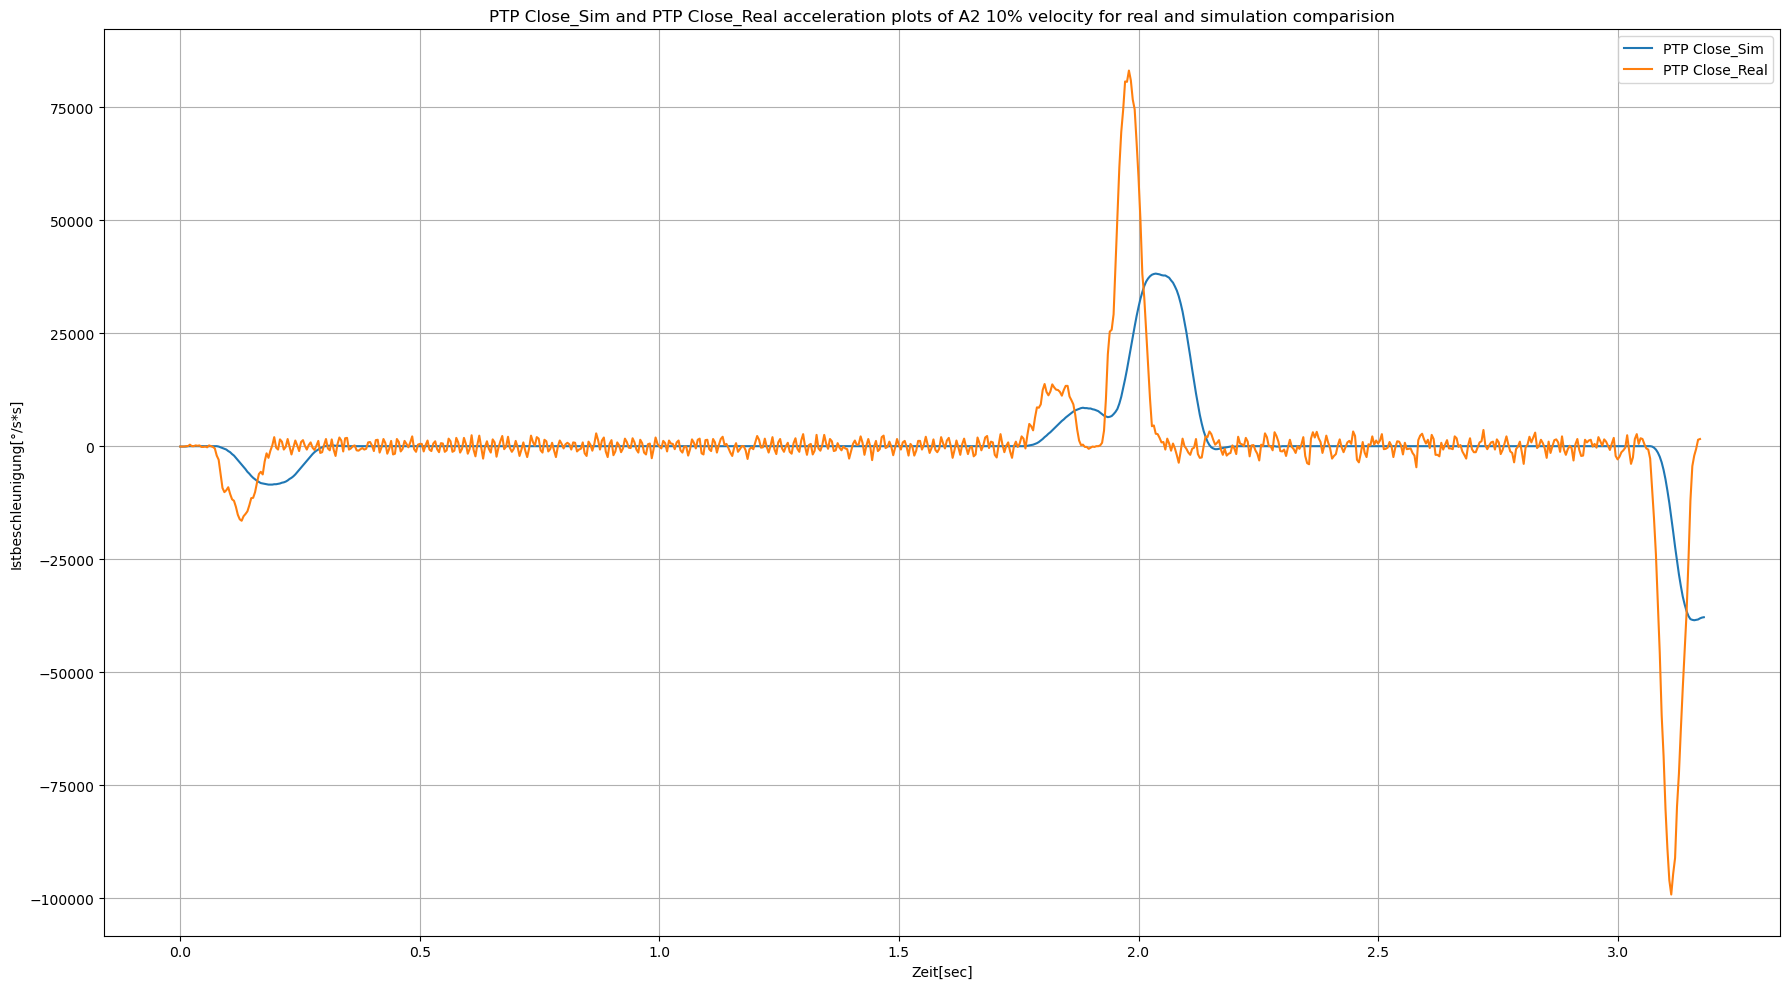

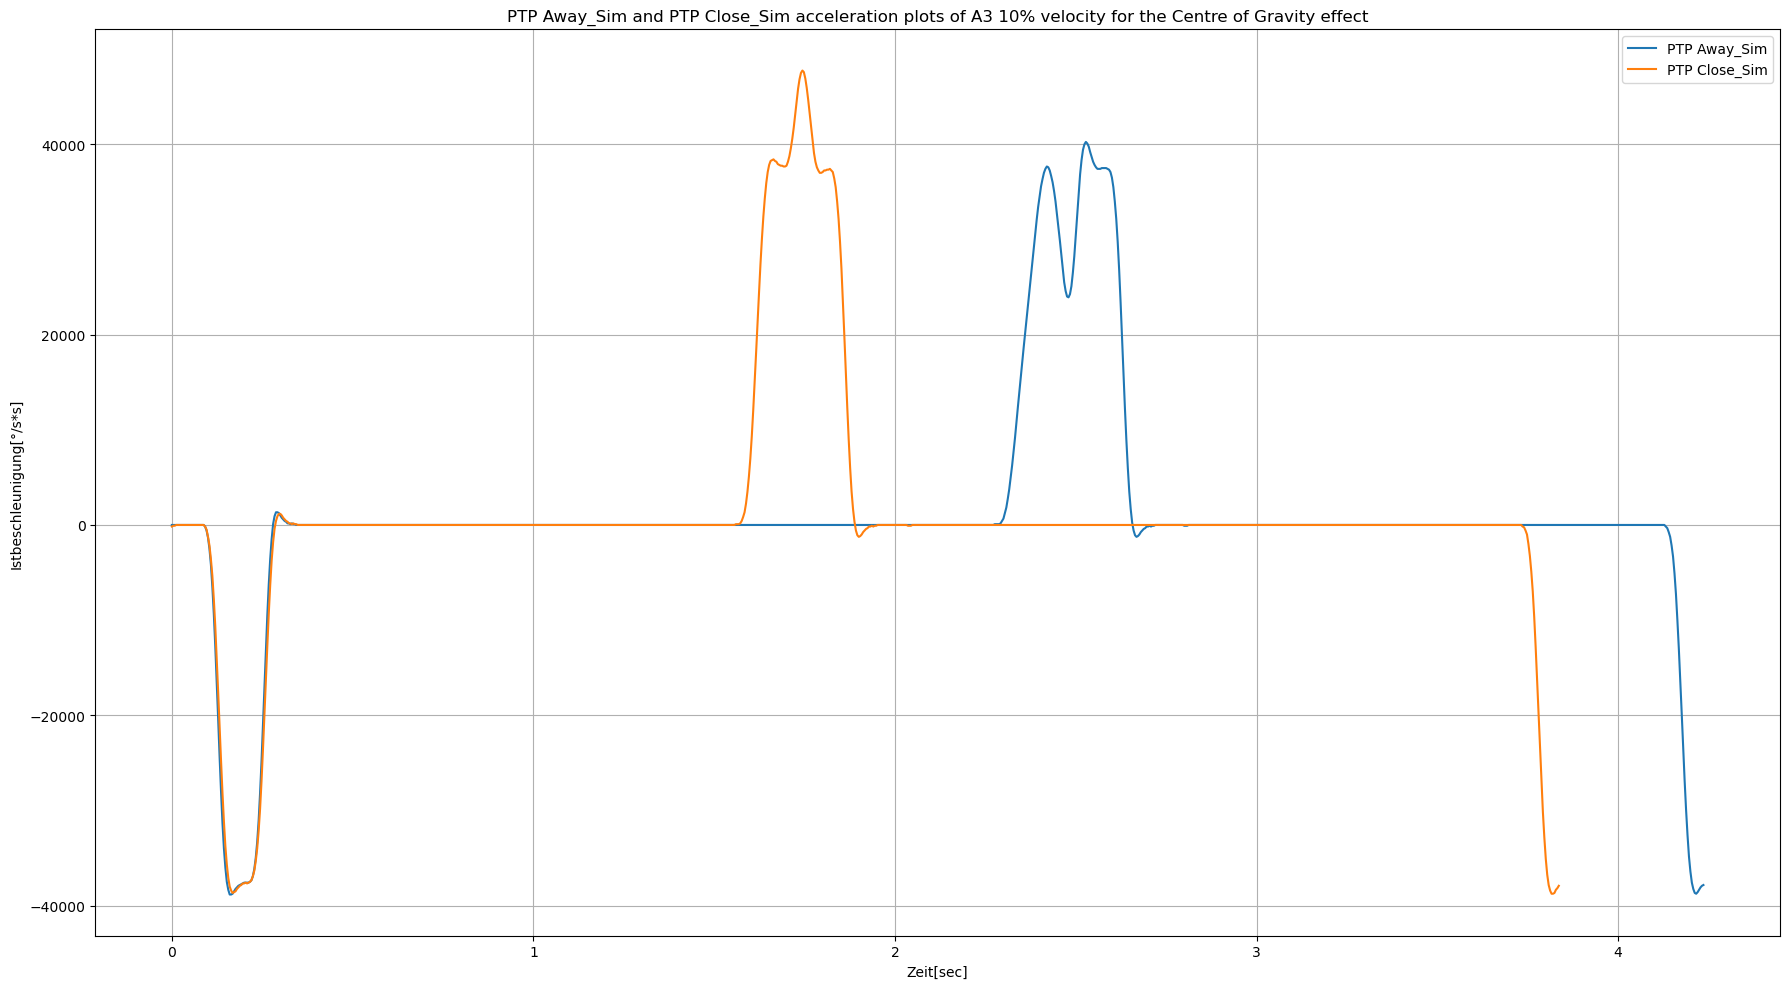

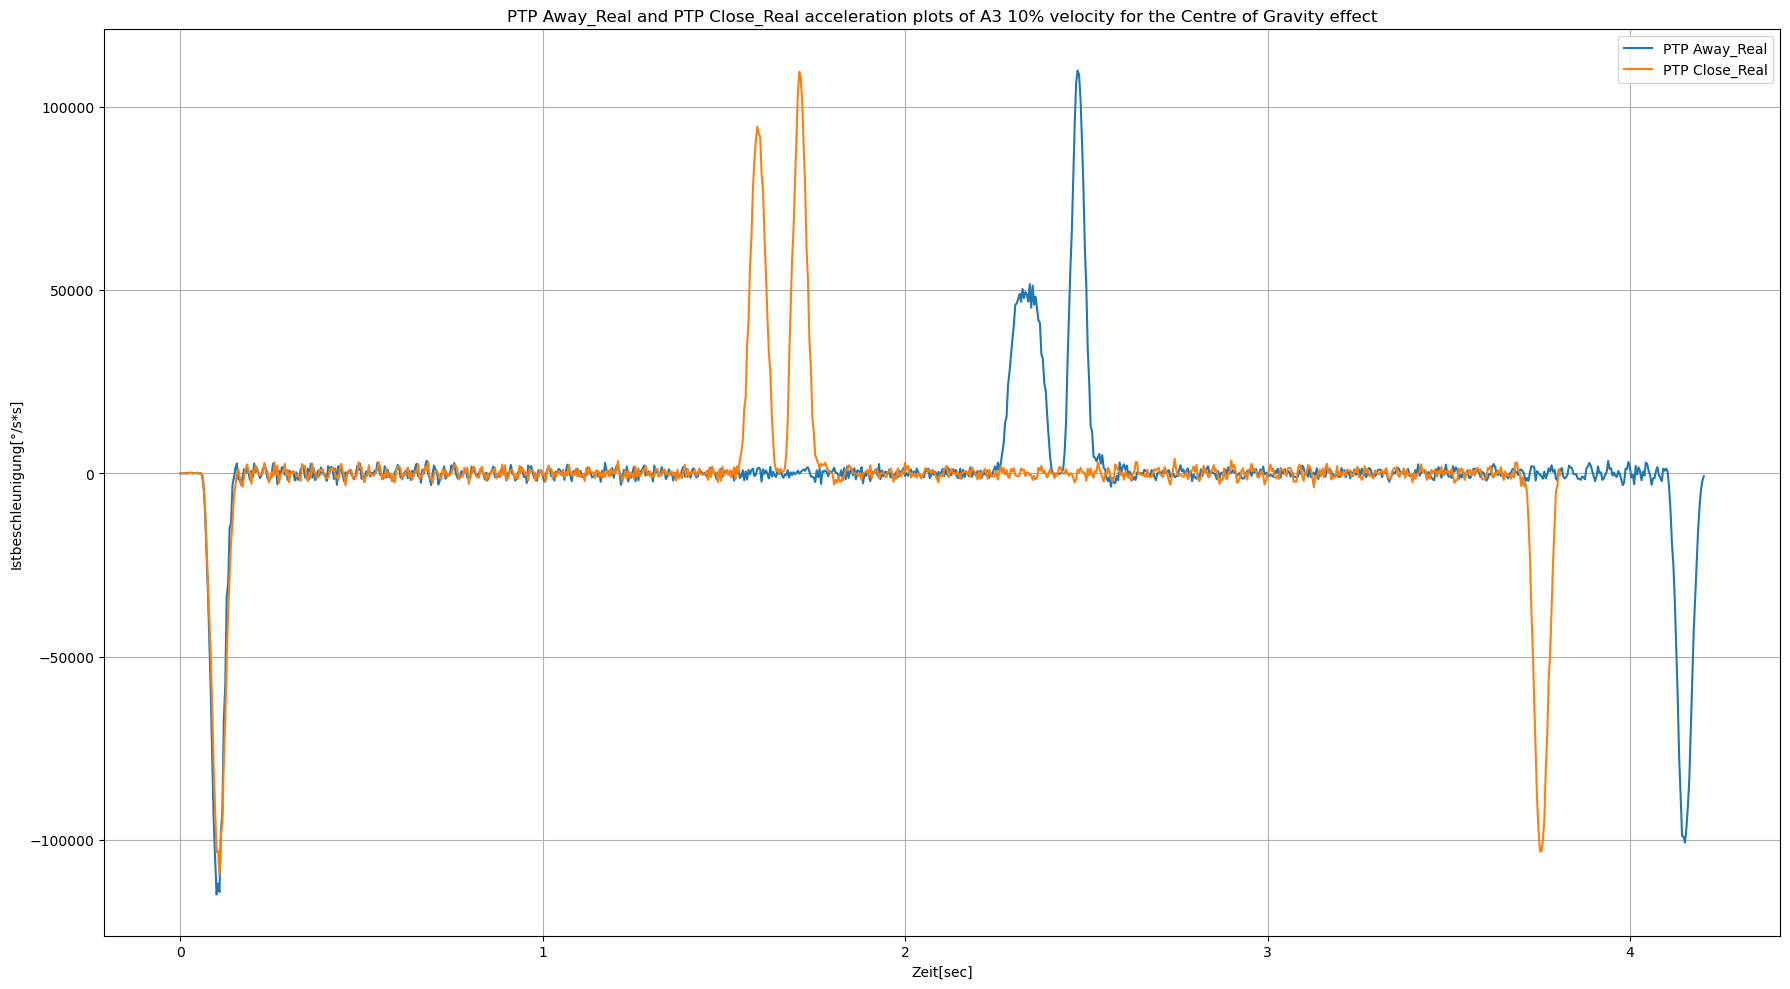

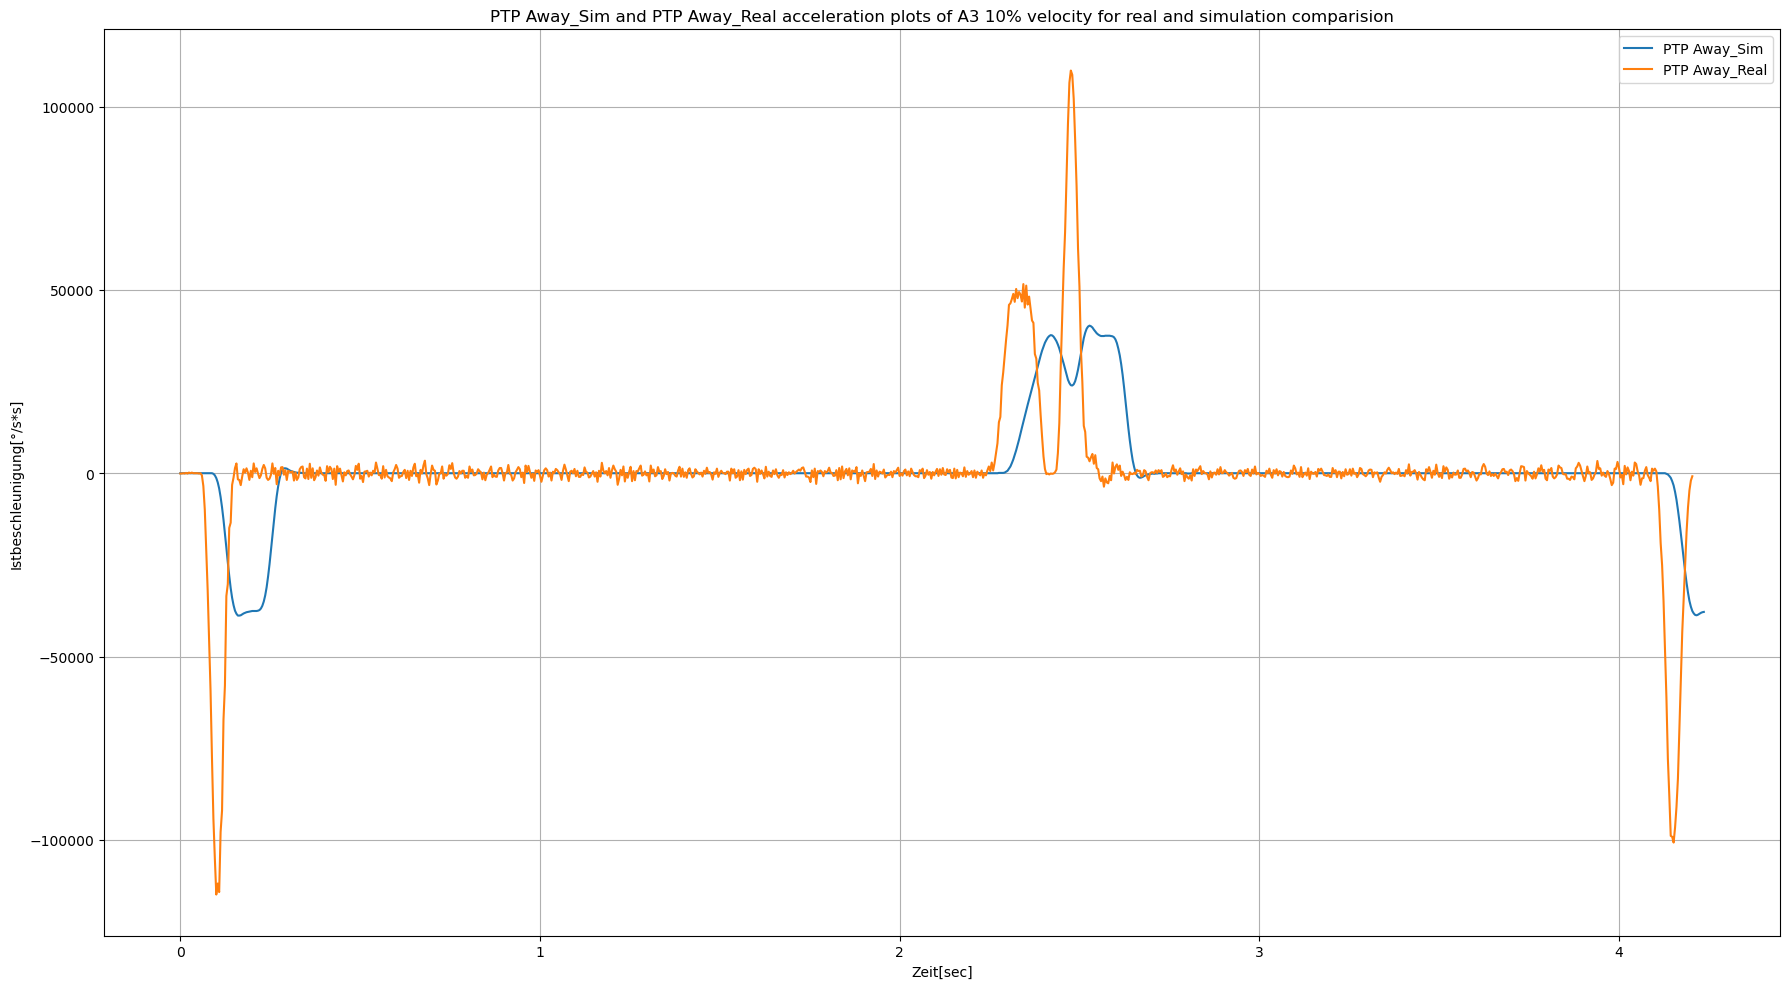

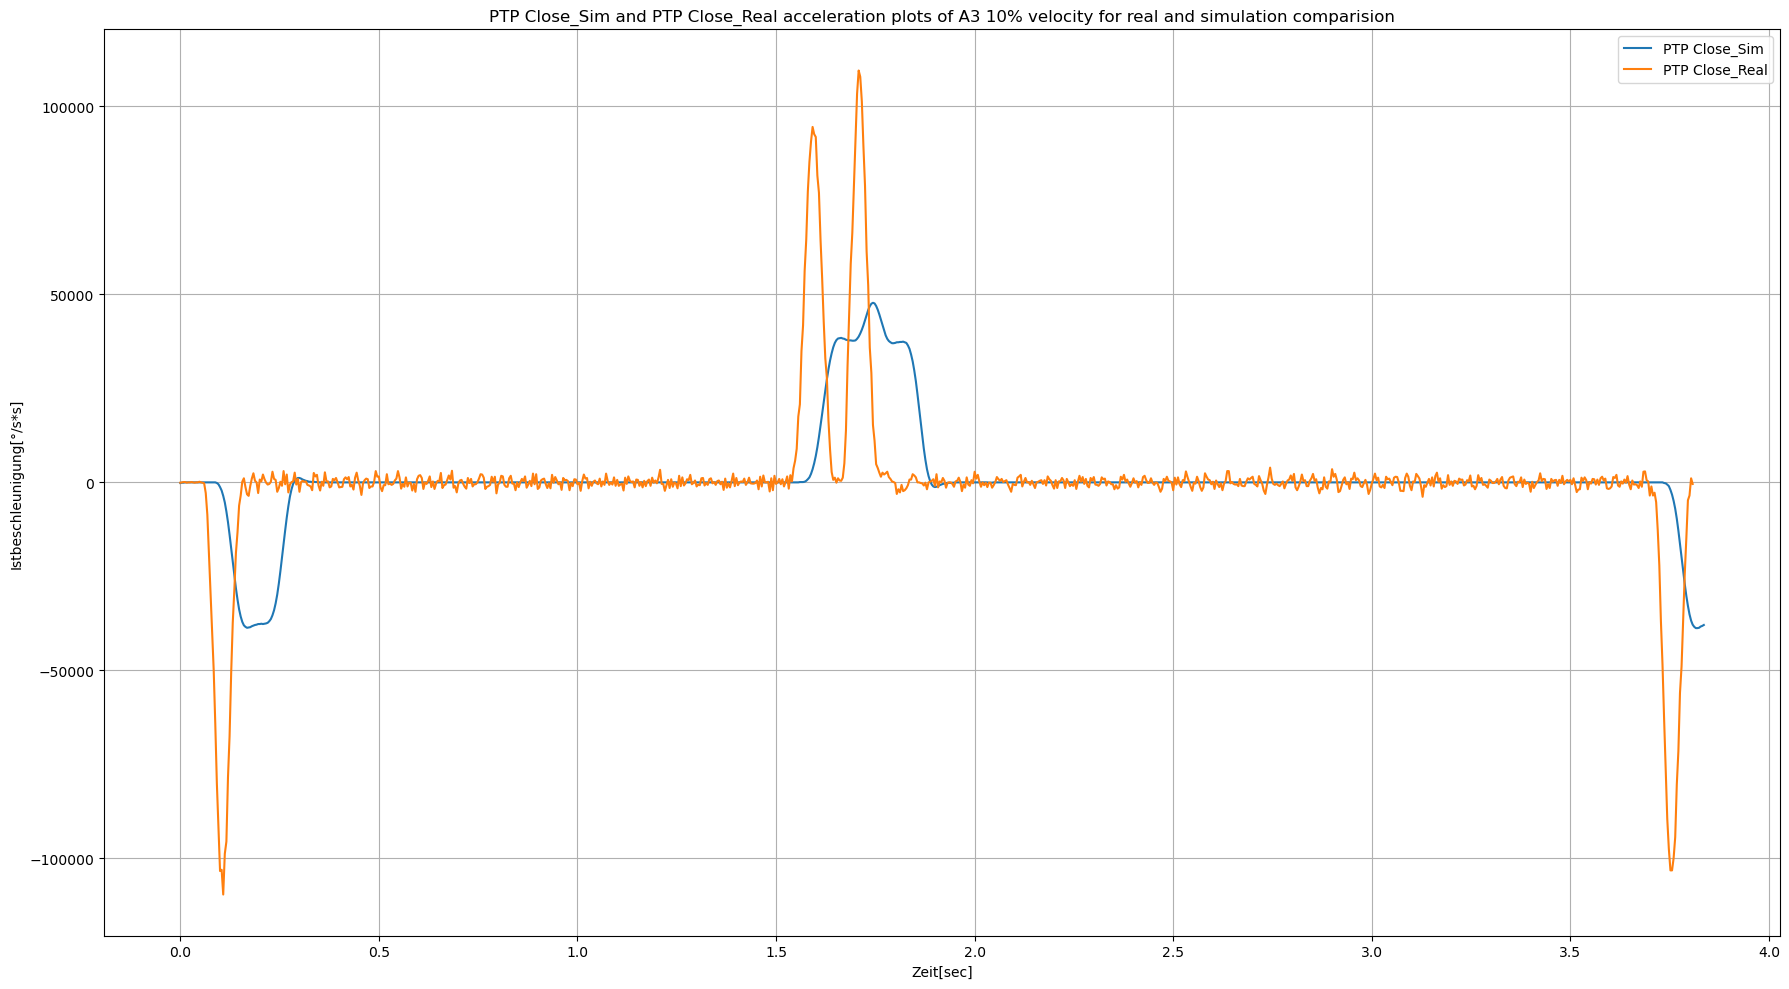

In [57]:
li_Away_Sim = []
li_Close_Sim =[]
li_Away_Real = []
li_Close_Real =[]
if (len(fileNames_Away_Sim)==len(fileNames_Away_Real) and len(fileNames_Close_Sim)==len(fileNames_Close_Real)):
    for i in range (len(fileNames_Away_Sim)):
        df_Away_Sim = pd.read_csv(fileNames_Away_Sim[i], delimiter=';', encoding='cp1252')
        df_Close_Sim = pd.read_csv(fileNames_Close_Sim[i], delimiter=';', encoding='cp1252')
        df_Away_Real = pd.read_csv(fileNames_Away_Real[i], delimiter=';', encoding='cp1252')
        df_Close_Real = pd.read_csv(fileNames_Close_Real[i], delimiter=';', encoding='cp1252')
        li_Away_Sim.append(df_Away_Sim)
        li_Close_Sim.append(df_Close_Sim)
        li_Away_Real.append(df_Away_Real)
        li_Close_Real.append(df_Close_Real)
          
        plt.figure(num=1, figsize=(18,10), dpi=100, tight_layout=True)
        plt.plot(li_Away_Sim[i]['Zeit[sec]'], li_Away_Sim[i]['Istbeschleunigung[°/s*s]'], label = 'PTP Away_Sim')
        plt.plot(li_Close_Sim[i]['Zeit[sec]'], li_Close_Sim[i]['Istbeschleunigung[°/s*s]'], label = 'PTP Close_Sim')
        plt.legend()
        plt.grid()
        # plt.xlim([0,1])
        # plt.ylim([0,1])
        plt.xlabel(li_Close_Sim[i].columns[0])
        plt.ylabel(li_Close_Sim[i].columns[8])
        plt.title('PTP Away_Sim and PTP Close_Sim acceleration plots of A' + str(i+1) +' 10% velocity for the Centre of Gravity effect')
        plt.savefig('Images/Centre_of_gravity/Sim/A' + str(i+1) + '.jpg')
        plt.show()
        plt.close()

        plt.figure(num=2, figsize=(18,10), dpi=100, tight_layout=True)
        plt.plot(li_Away_Real[i]['Zeit[sec]'], li_Away_Real[i]['Istbeschleunigung[°/s*s]'], label = 'PTP Away_Real')
        plt.plot(li_Close_Real[i]['Zeit[sec]'], li_Close_Real[i]['Istbeschleunigung[°/s*s]'], label = 'PTP Close_Real')
        plt.legend()
        plt.grid()
        # plt.xlim([0,1])
        # plt.ylim([0,1])
        plt.xlabel(li_Close_Sim[i].columns[0])
        plt.ylabel(li_Close_Sim[i].columns[8])
        plt.title('PTP Away_Real and PTP Close_Real acceleration plots of A' + str(i+1) +' 10% velocity for the Centre of Gravity effect')
        plt.savefig('Images/Centre_of_gravity/Real/A' + str(i+1) + '.jpg')
        plt.show()
        plt.close()

        plt.figure(num=3, figsize=(18,10), dpi=100, tight_layout=True)
        plt.plot(li_Away_Sim[i]['Zeit[sec]'], li_Away_Sim[i]['Istbeschleunigung[°/s*s]'], label = 'PTP Away_Sim')
        plt.plot(li_Away_Real[i]['Zeit[sec]'], li_Away_Real[i]['Istbeschleunigung[°/s*s]'], label = 'PTP Away_Real')
        plt.legend()
        plt.grid()
        # plt.xlim([0,1])
        # plt.ylim([0,1])
        plt.xlabel(li_Close_Sim[i].columns[0])
        plt.ylabel(li_Close_Sim[i].columns[8])
        plt.title('PTP Away_Sim and PTP Away_Real acceleration plots of A' + str(i+1) +' 10% velocity for real and simulation comparision')
        plt.savefig('Images/Comparision_Real_Sim/Away/A' + str(i+1) + '.jpg')
        plt.show()
        plt.close()

        plt.figure(num=4, figsize=(18,10), dpi=100, tight_layout=True)
        plt.plot(li_Close_Sim[i]['Zeit[sec]'], li_Close_Sim[i]['Istbeschleunigung[°/s*s]'], label = 'PTP Close_Sim')
        plt.plot(li_Close_Real[i]['Zeit[sec]'], li_Close_Real[i]['Istbeschleunigung[°/s*s]'], label = 'PTP Close_Real')
        plt.legend()
        plt.grid()
        # plt.xlim([0,1])
        # plt.ylim([0,1])
        plt.xlabel(li_Close_Sim[i].columns[0])
        plt.ylabel(li_Close_Sim[i].columns[8])
        plt.title('PTP Close_Sim and PTP Close_Real acceleration plots of A' + str(i+1) +' 10% velocity for real and simulation comparision')
        plt.savefig('Images/Comparision_Real_Sim/Close/A' + str(i+1) + '.jpg')
        plt.show()
        plt.close()